In [113]:
import pandas as pd
import numpy as np
from datetime import datetime

df_2015 = pd.read_csv("../dataset/acidentes-transito-2015.csv", parse_dates=['data'])
df_2016 = pd.read_csv("../dataset/acidentes_2016.csv", parse_dates=['data'])
df_2017 = pd.read_csv("../dataset/acidentes_2017.csv", parse_dates=['data'])
df_2018 = pd.read_csv("../dataset/acidentes_2018.csv", parse_dates=['data'])
df_2019 = pd.read_csv("../dataset/acidentes-2019.csv", parse_dates=['data'])

In [412]:
def getOccurrencesPerDay(df):
    return pd.DataFrame(df.data.value_counts())

frames = [getOccurrencesPerDay(df_2015), getOccurrencesPerDay(df_2016), getOccurrencesPerDay(df_2017), getOccurrencesPerDay(df_2018), getOccurrencesPerDay(df_2019)]
df = pd.concat(frames)
df.sort_index(inplace=True)
df.reset_index(inplace=True)
df.columns=  ['Date', 'Total_Accident']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1675 non-null   datetime64[ns]
 1   Total_Accident  1675 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 26.3 KB


In [37]:
df.describe()

Total_Accident
count     1675.000000
mean        32.099701
std         10.799087
min          3.000000
25%         24.000000
50%         33.000000
75%         40.000000
max         65.000000

In [48]:
data = pd.concat([df.set_index('Date').Total_Accident.shift(), df.set_index('Date')], axis=1)
data.columns = ['t', 't+1']
data.dropna(inplace=True)
data.head(5)


t  t+1
Date                 
2015-06-02  39.0   49
2015-06-03  49.0   46
2015-06-04  46.0   28
2015-06-05  28.0   40
2015-06-06  40.0   33

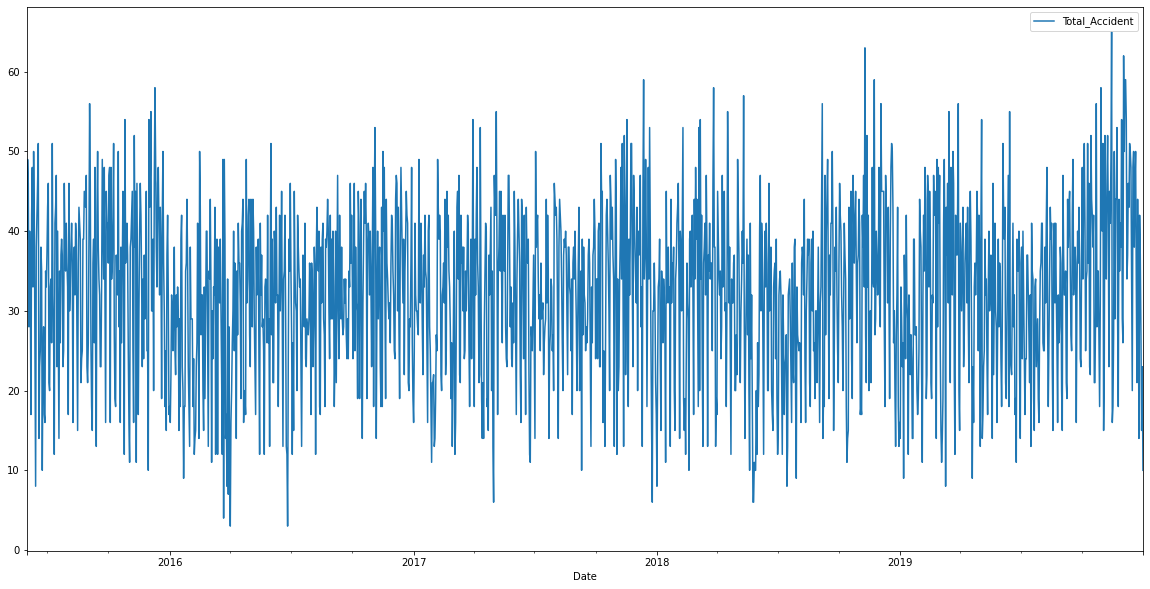

In [61]:
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (20,10)

df.set_index('Date').plot()
pyplot.show()


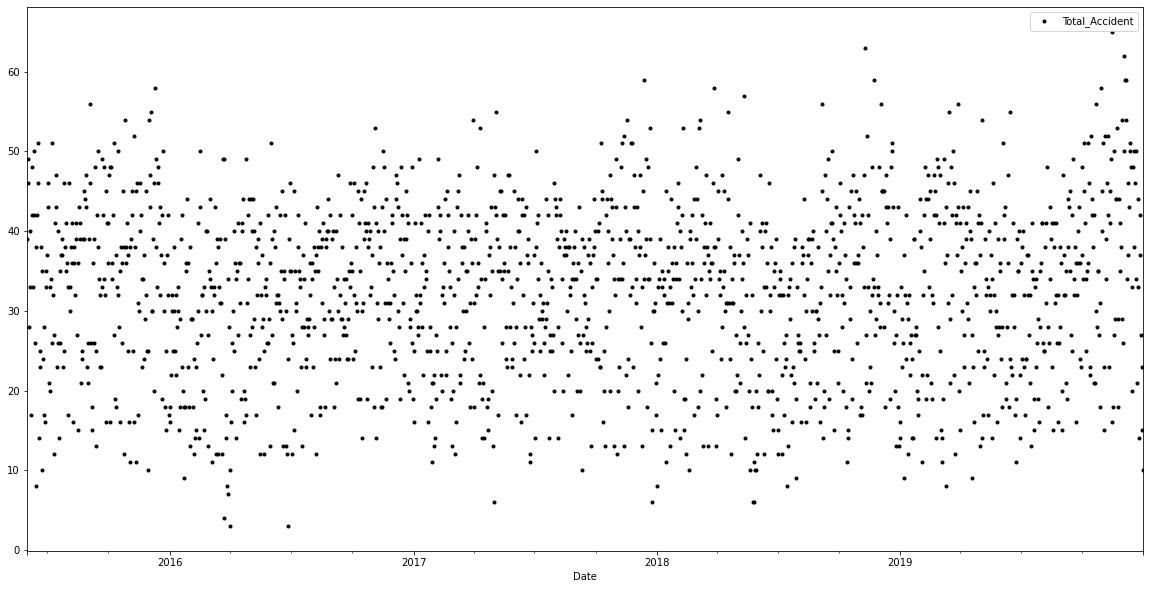

In [62]:
df.set_index('Date').plot(style='k.')
pyplot.show()


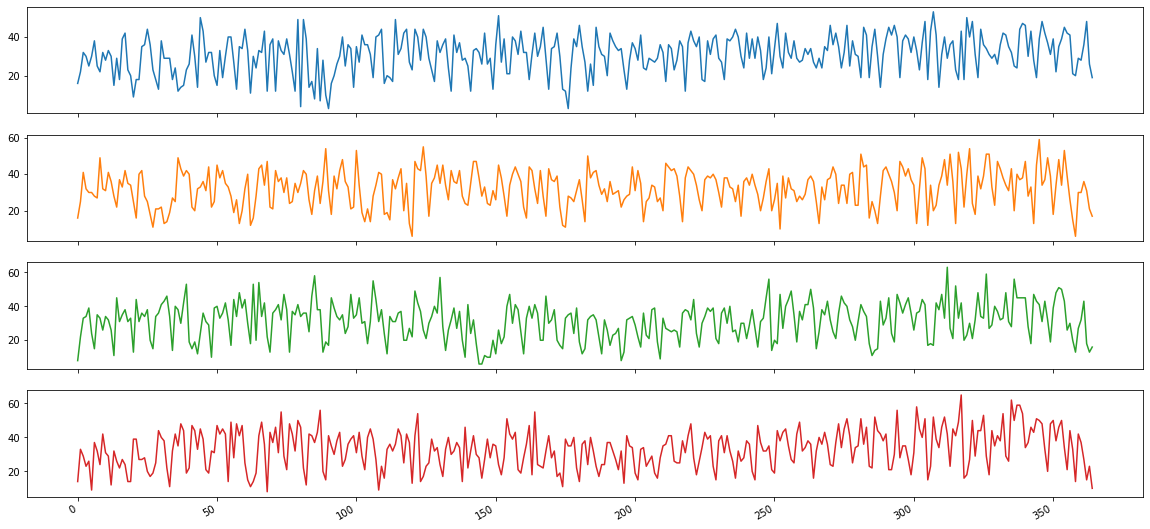

In [92]:
groups = df[df.Date > '2016'].set_index('Date').groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = years[name.year] = [x[0] for x in group.values.tolist()]
years.plot(subplots=True, legend=False)
pyplot.show()

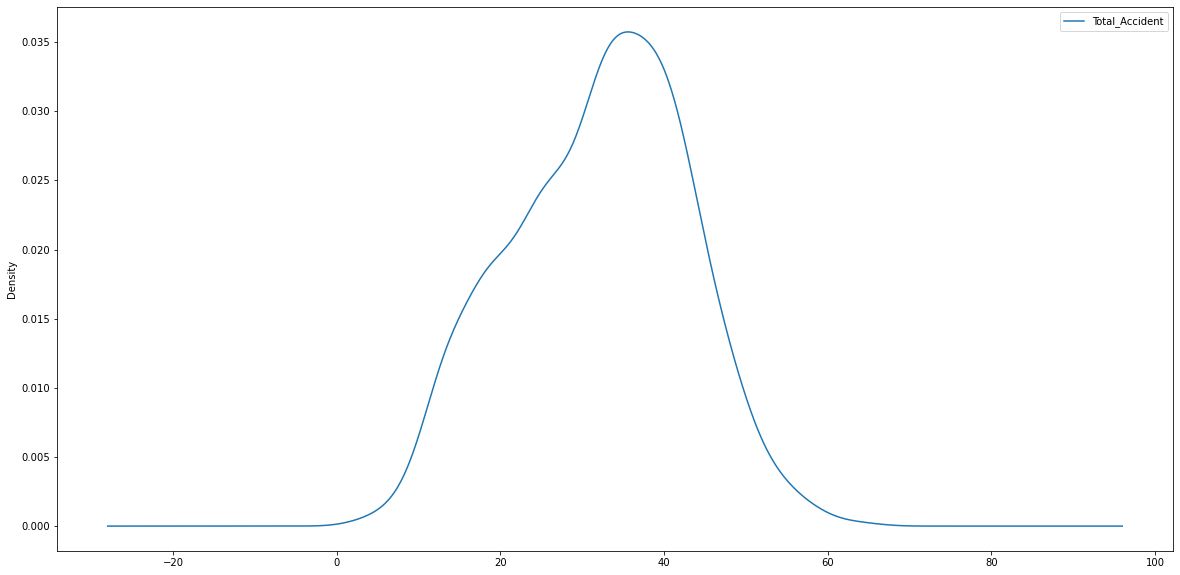

In [72]:
df.set_index('Date').plot(kind='kde')
pyplot.show()

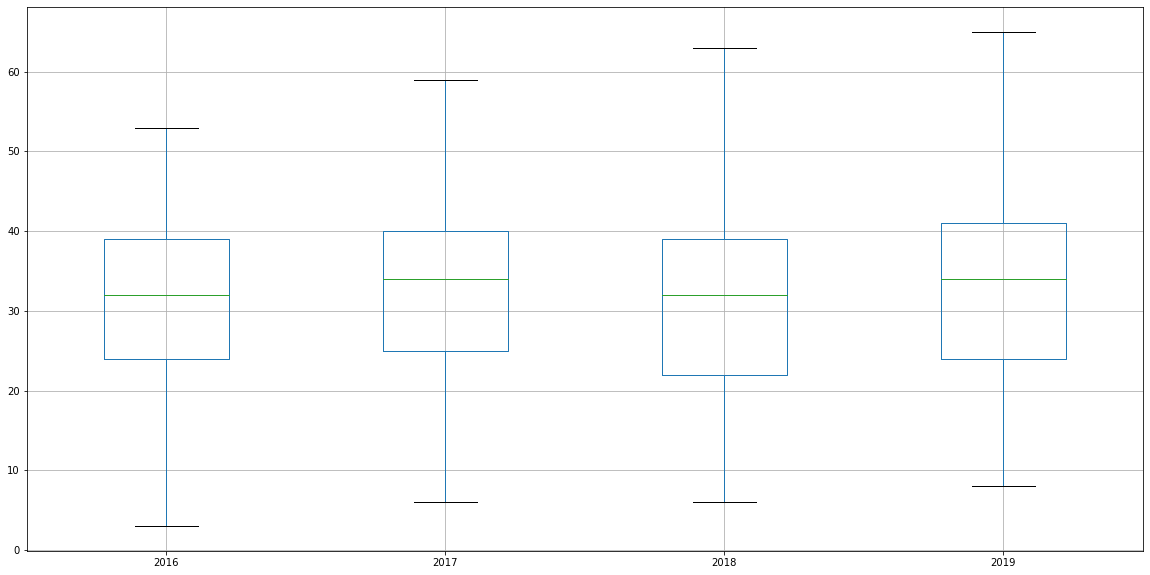

In [90]:
groups = df[df.Date > '2016'].set_index('Date').groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = [x[0] for x in group.values.tolist()]
years.boxplot()
pyplot.show()

C:\Users\joaog\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


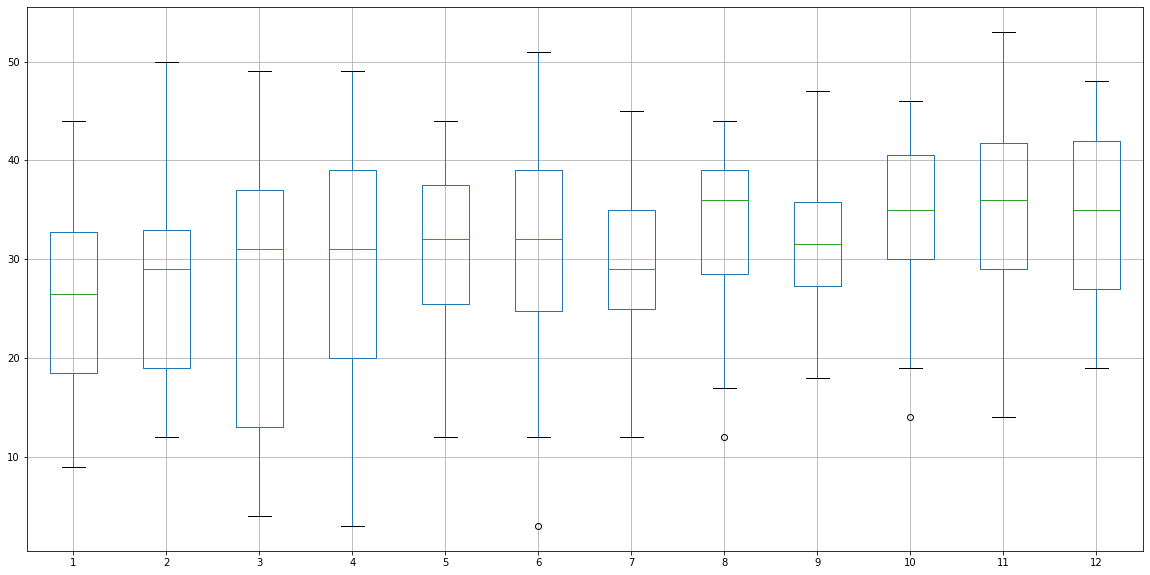

In [102]:
one_year = df[(df.Date > '2016') & (df.Date < '2017')].set_index('Date')
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

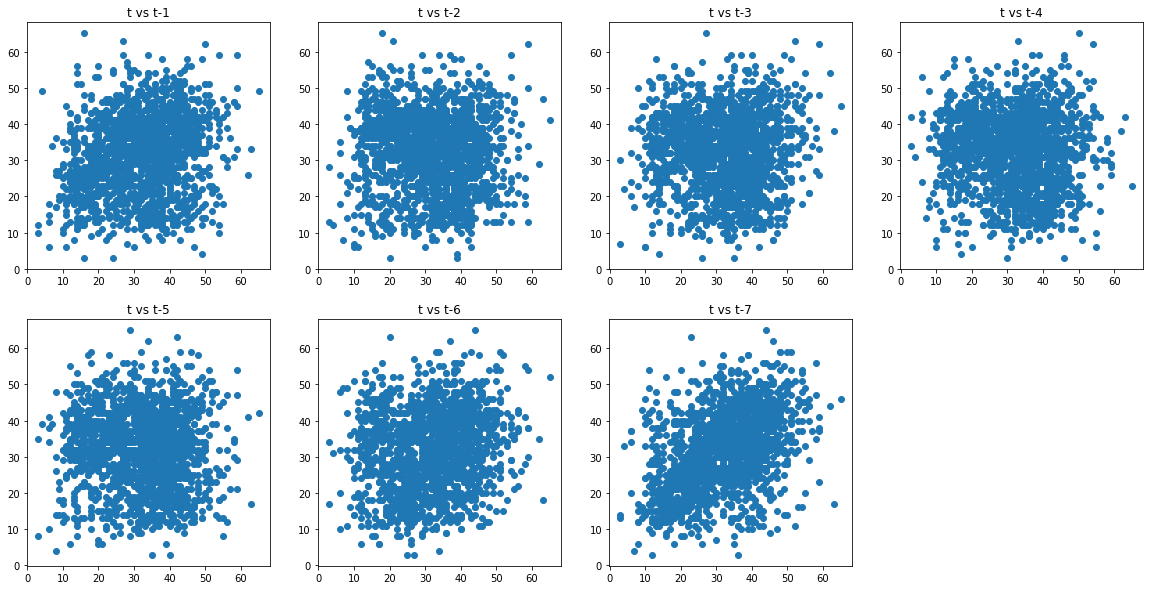

In [103]:
values = pd.DataFrame(df.set_index('Date'))
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()


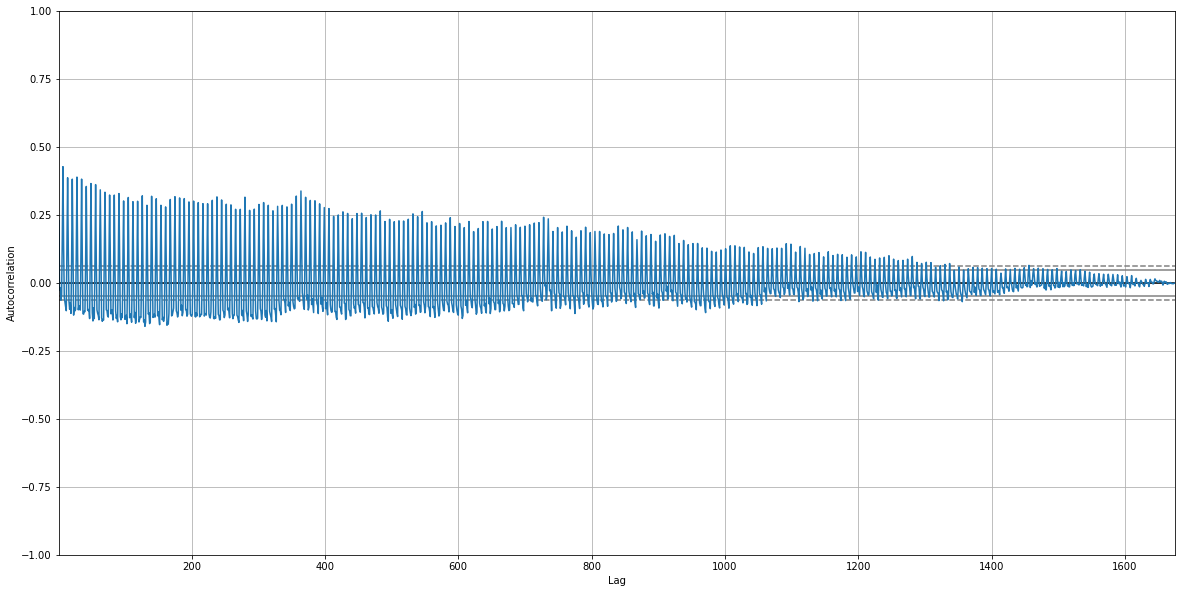

In [104]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.set_index('Date'))
pyplot.show()


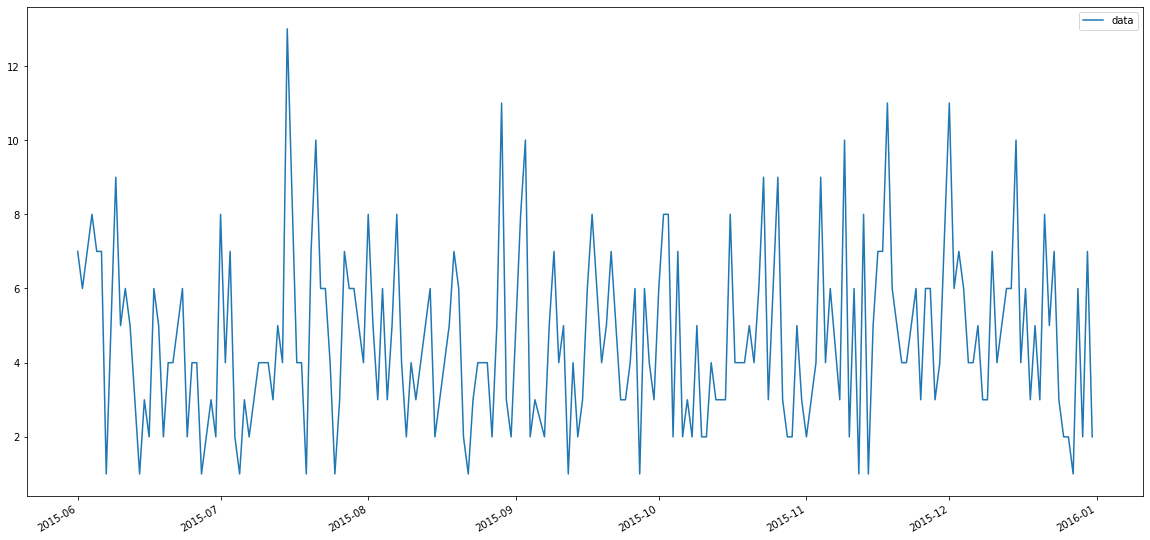

In [109]:
bairro_df = getOccurrencesPerDay(df_2015[df_2015.bairro == 'BOA VIAGEM'])
bairro_df.sort_index().plot()

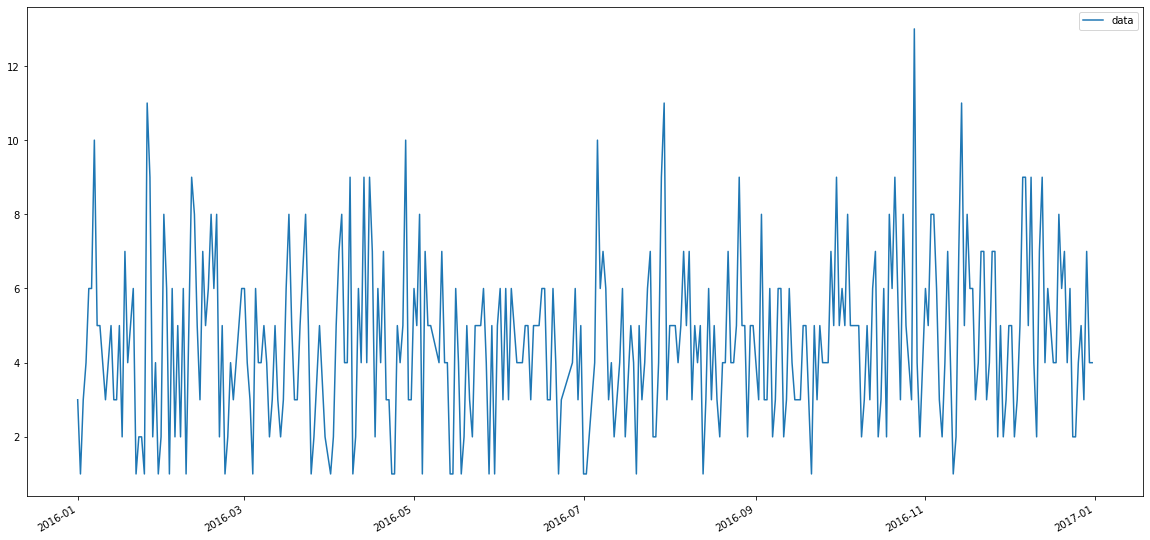

In [110]:
bairro_df = getOccurrencesPerDay(df_2016[df_2016.bairro == 'BOA VIAGEM'])
bairro_df.sort_index().plot()

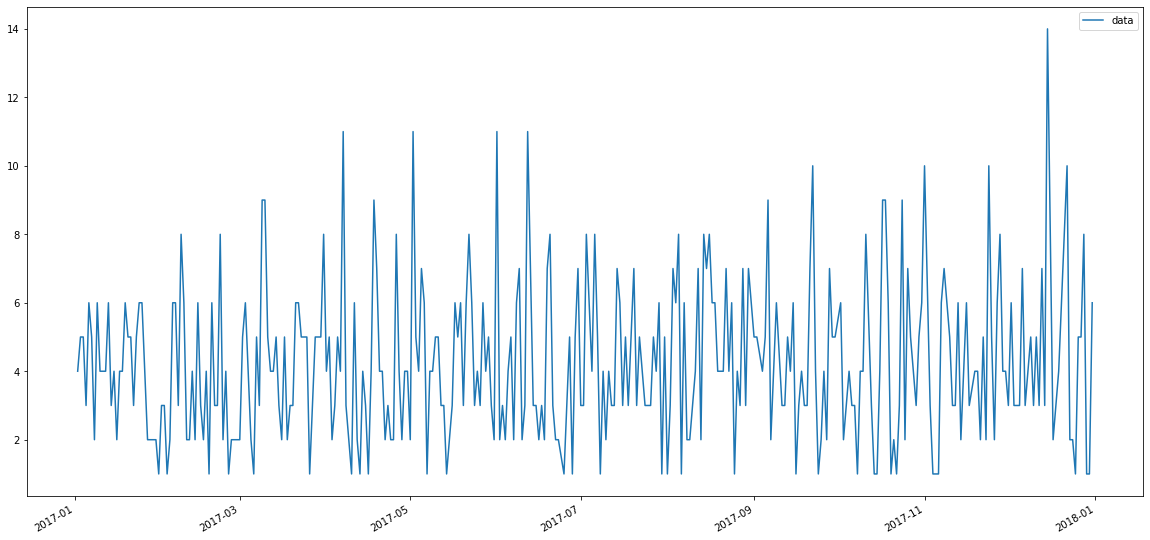

In [111]:
bairro_df = getOccurrencesPerDay(df_2017[df_2017.bairro == 'BOA VIAGEM'])
bairro_df.sort_index().plot()

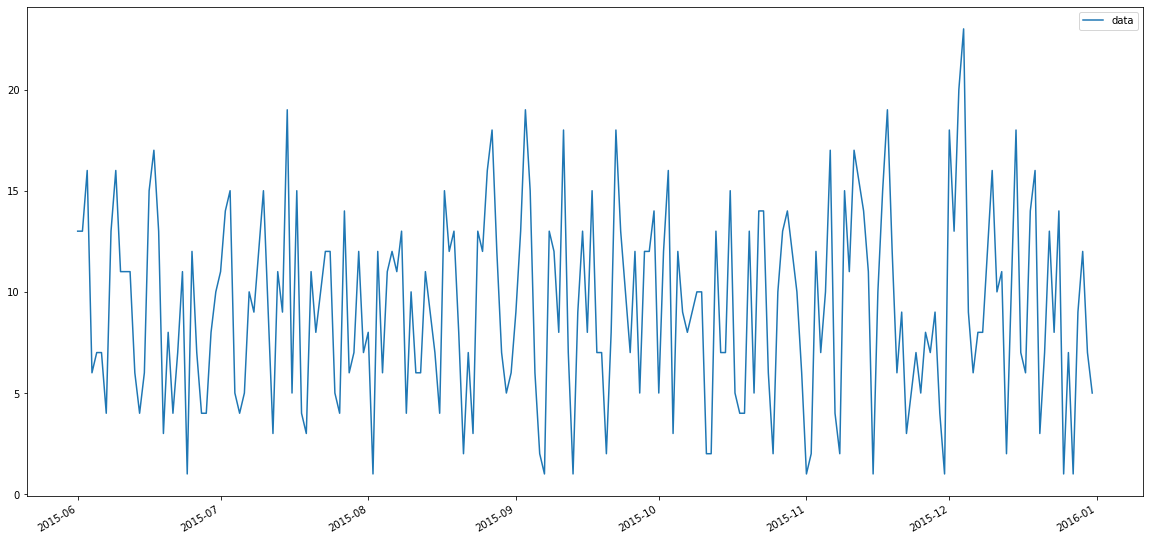

In [118]:
manha_df = getOccurrencesPerDay(df_2015[(df_2015.hora >= '08') & (df_2015.hora <= '12')])
manha_df.sort_index().plot()

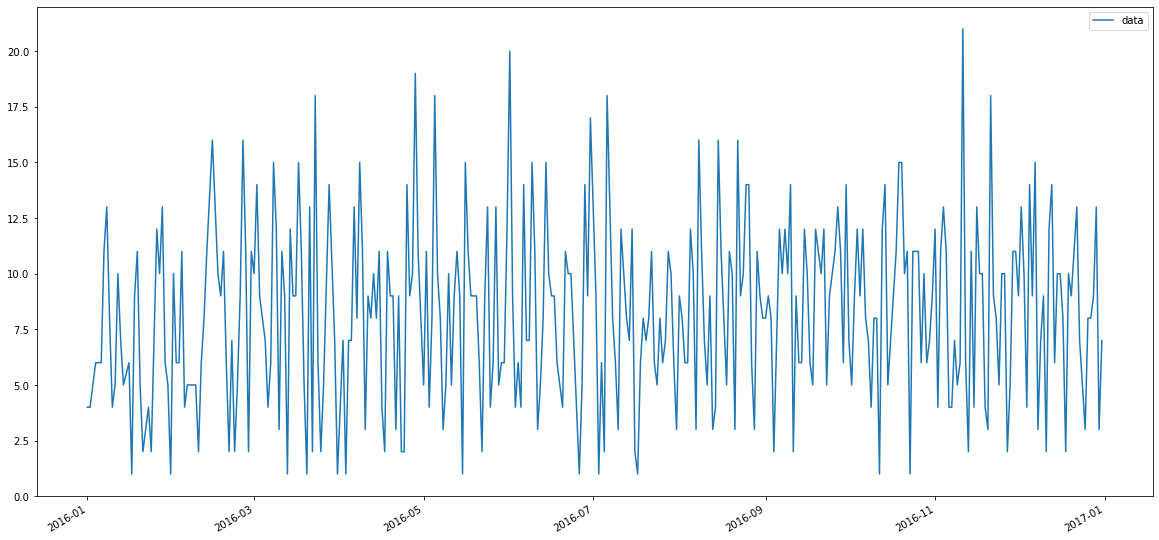

In [121]:
manha_df = getOccurrencesPerDay(df_2016[(df_2016.hora >= '08') & (df_2016.hora <= '12')])
manha_df.sort_index().plot()

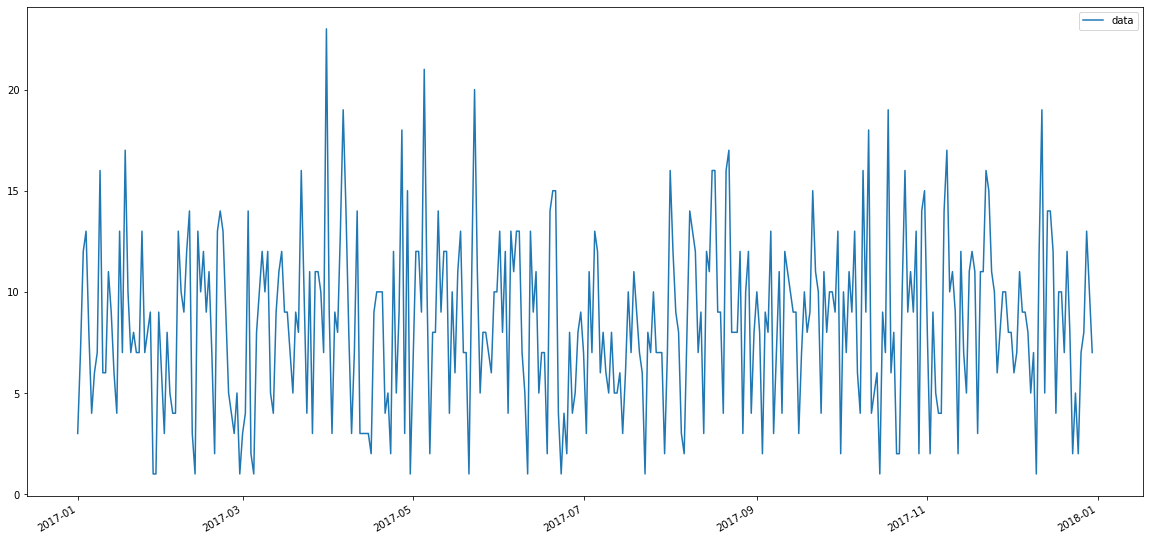

In [122]:
manha_df = getOccurrencesPerDay(df_2017[(df_2017.hora >= '08') & (df_2017.hora <= '12')])
manha_df.sort_index().plot()

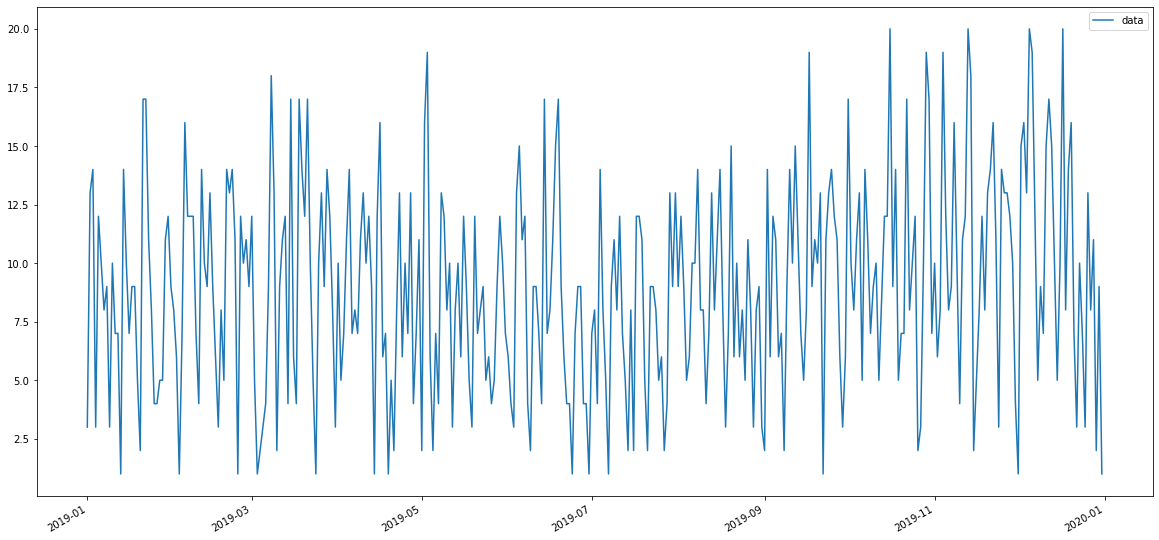

In [123]:
manha_df = getOccurrencesPerDay(df_2019[(df_2019.hora >= '08') & (df_2019.hora <= '12')])
manha_df.sort_index().plot()

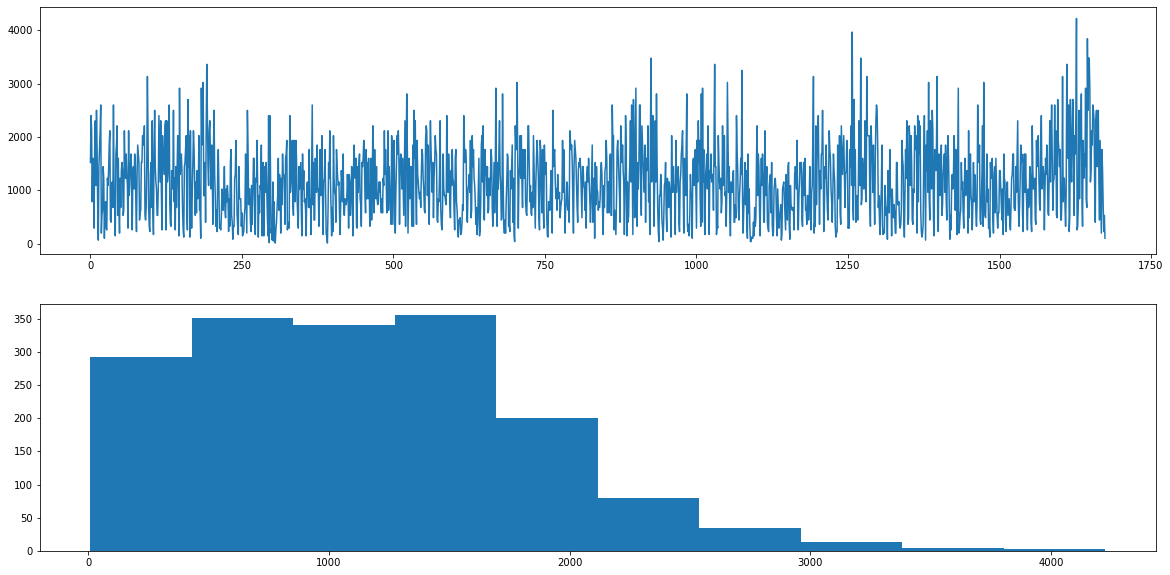

In [125]:
series = [i**2 for i in df.Total_Accident]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()


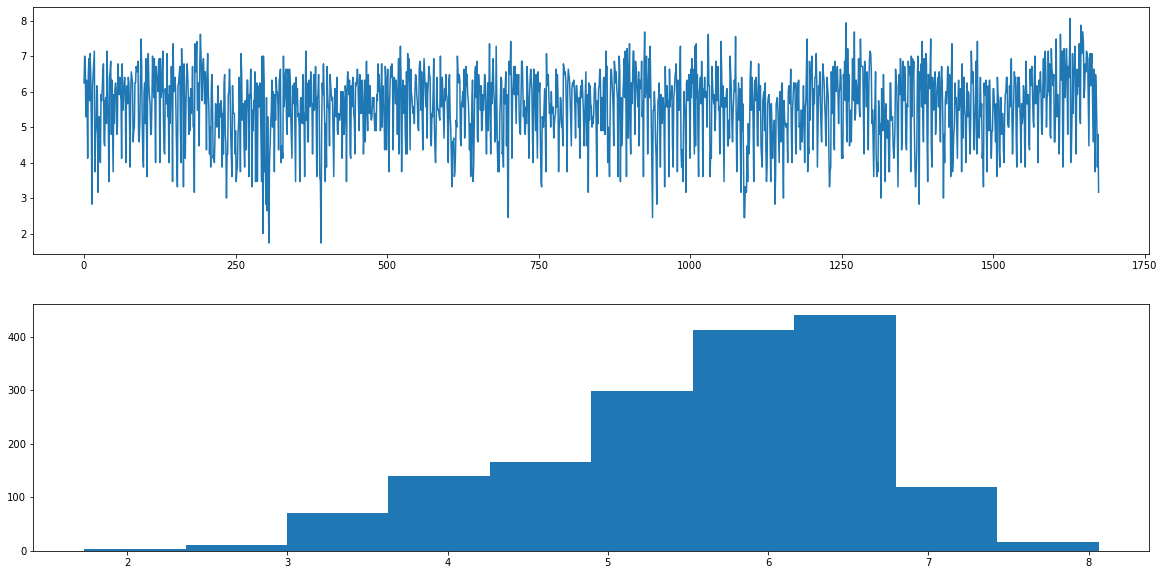

In [126]:
dataframe = pd.DataFrame(df.set_index('Date').values)
dataframe.columns = ['passengers']
dataframe['passengers'] = np.sqrt(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()


(array([1.673e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.00855369e+01, 1.69488924e+27, 3.38977849e+27, 5.08466773e+27,
        6.77955698e+27, 8.47444622e+27, 1.01693355e+28, 1.18642247e+28,
        1.35591140e+28, 1.52540032e+28, 1.69488924e+28]),
 <a list of 10 Patch objects>)

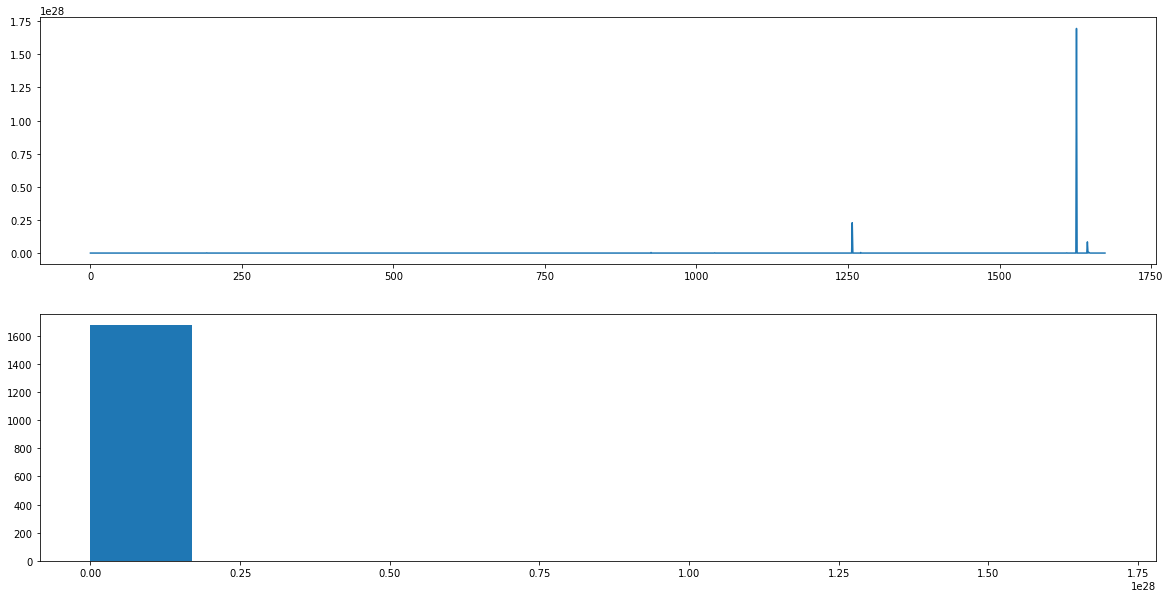

In [127]:
from math import exp
series = [exp(i) for i in df.Total_Accident]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)

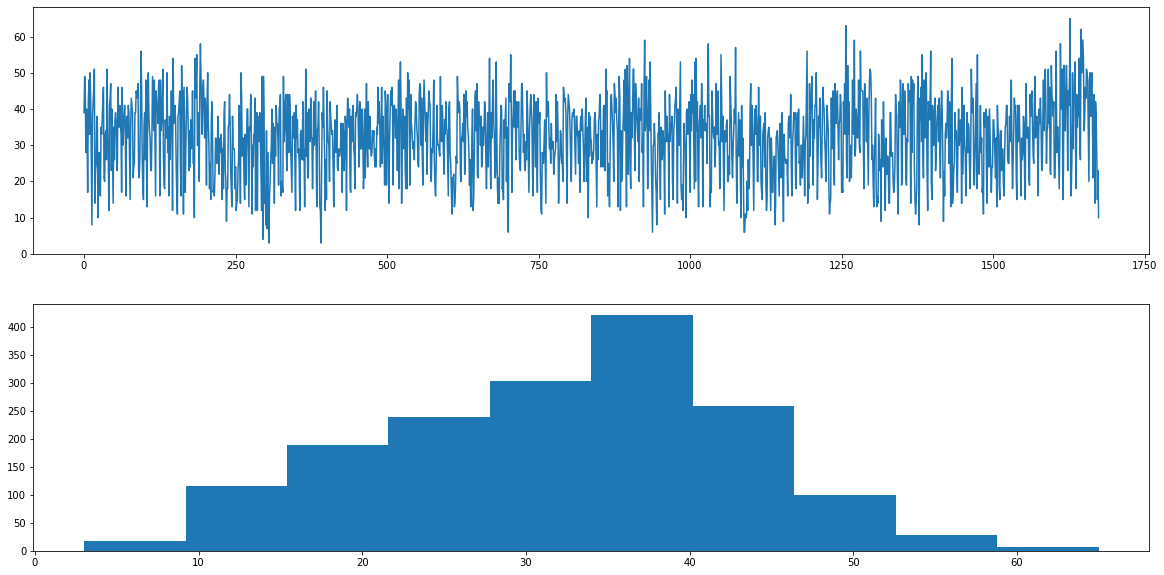

In [129]:
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in df.Total_Accident]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

Lambda: 1.043732


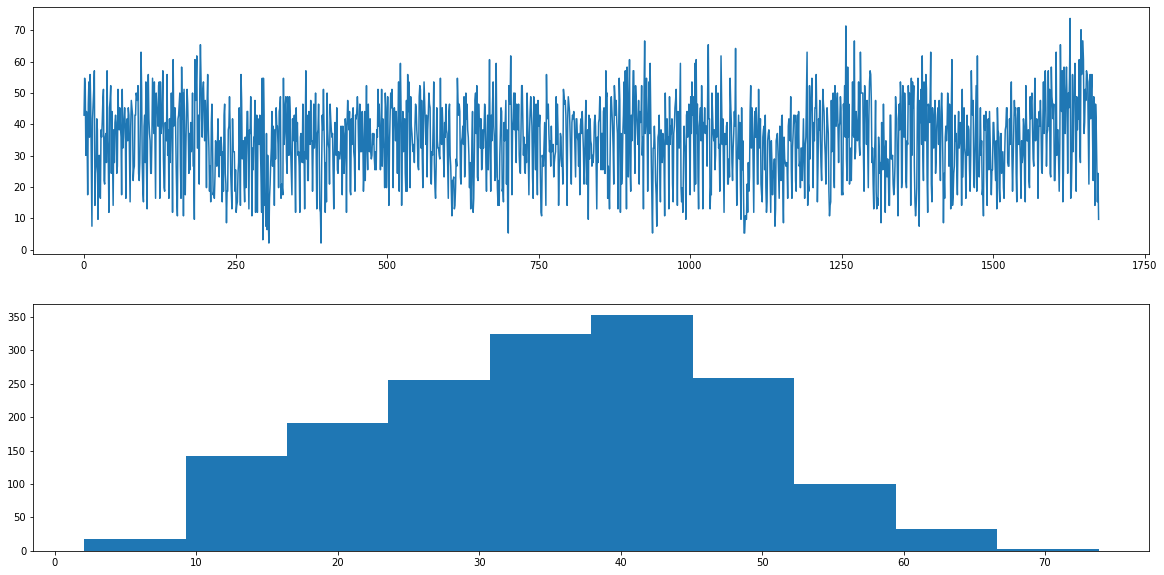

In [130]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = df.set_index('Date')
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

            Total_Accident
Date                      
2015-06-01             NaN
2015-06-02             NaN
2015-06-03       44.666667
2015-06-04       41.000000
2015-06-05       38.000000
2015-06-06       33.666667
2015-06-07       30.000000
2015-06-08       30.666667
2015-06-09       35.666667
2015-06-10       41.000000


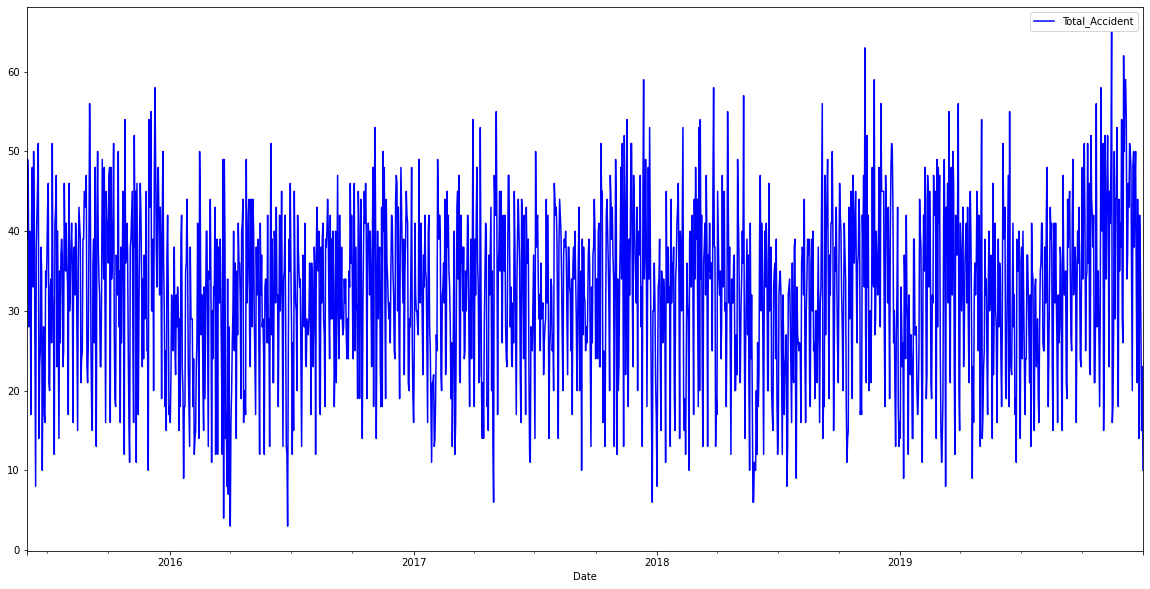

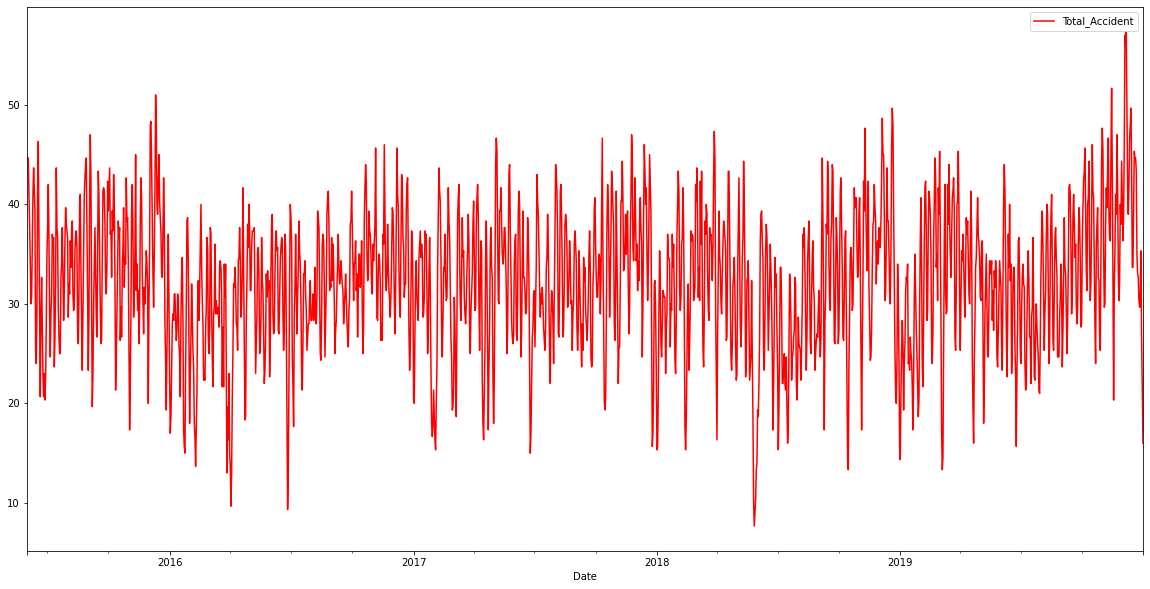

In [134]:
# tail-rolling average transform
series = df.set_index('Date')
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot(color='blue')
rolling_mean.plot(color='red')
pyplot.show()



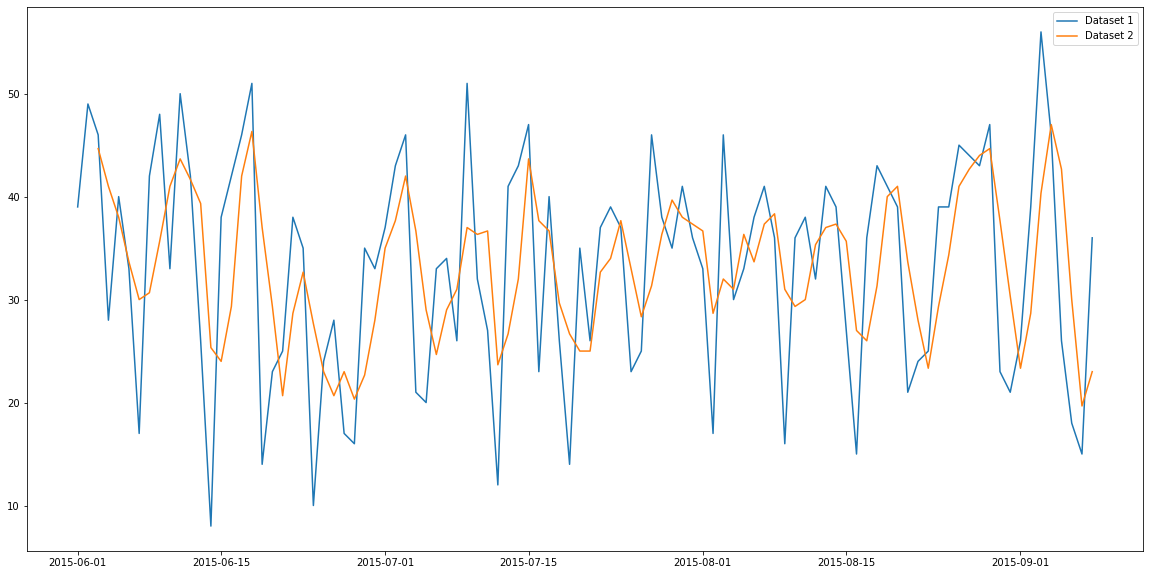

In [137]:
import matplotlib.pyplot as plt
# zoomed plot original and transformed dataset
plt.plot(series[:100])
plt.plot(rolling_mean[:100])

plt.legend(["Dataset 1", "Dataset 2"])
#series[:100].plot(color='blue')
#rolling_mean[:100].plot(color='red')
plt.show()

In [149]:
df1 = df.set_index('Date')
width = 3
lag1 = df1.shift(1)
lag3 = df1.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lag1, df1], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))


                 mean     t  t+1
Date                            
2015-06-01        NaN   NaN   39
2015-06-02        NaN  39.0   49
2015-06-03        NaN  49.0   46
2015-06-04        NaN  46.0   28
2015-06-05  44.666667  28.0   40
2015-06-06  41.000000  40.0   33
2015-06-07  38.000000  33.0   17
2015-06-08  33.666667  17.0   42
2015-06-09  30.000000  42.0   48
2015-06-10  30.666667  48.0   33


predicted=44.666667, expected=28.000000
predicted=41.000000, expected=40.000000
predicted=38.000000, expected=33.000000
predicted=33.666667, expected=17.000000
predicted=30.000000, expected=42.000000
predicted=30.666667, expected=48.000000
predicted=35.666667, expected=33.000000
predicted=41.000000, expected=50.000000
predicted=43.666667, expected=42.000000
predicted=41.666667, expected=26.000000
predicted=39.333333, expected=8.000000
predicted=25.333333, expected=38.000000
predicted=24.000000, expected=42.000000
predicted=29.333333, expected=46.000000
predicted=42.000000, expected=51.000000
predicted=46.333333, expected=14.000000
predicted=37.000000, expected=23.000000
predicted=29.333333, expected=25.000000
predicted=20.666667, expected=38.000000
predicted=28.666667, expected=35.000000
predicted=32.666667, expected=10.000000
predicted=27.666667, expected=24.000000
predicted=23.000000, expected=28.000000
predicted=20.666667, expected=17.000000
predicted=23.000000, expected=16.000000
p

Test RMSE: 12.327


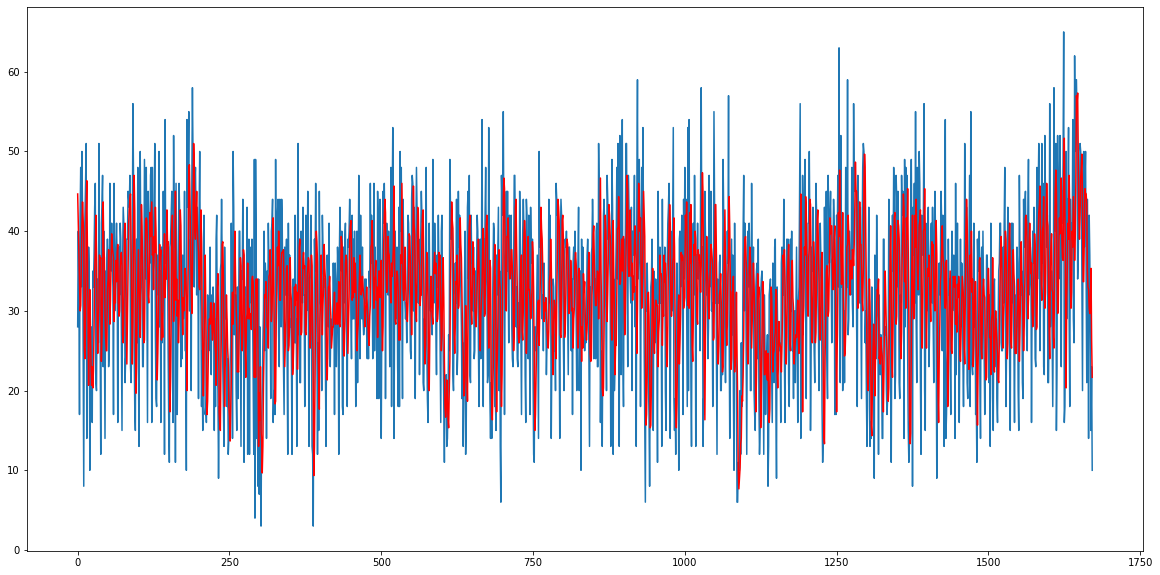

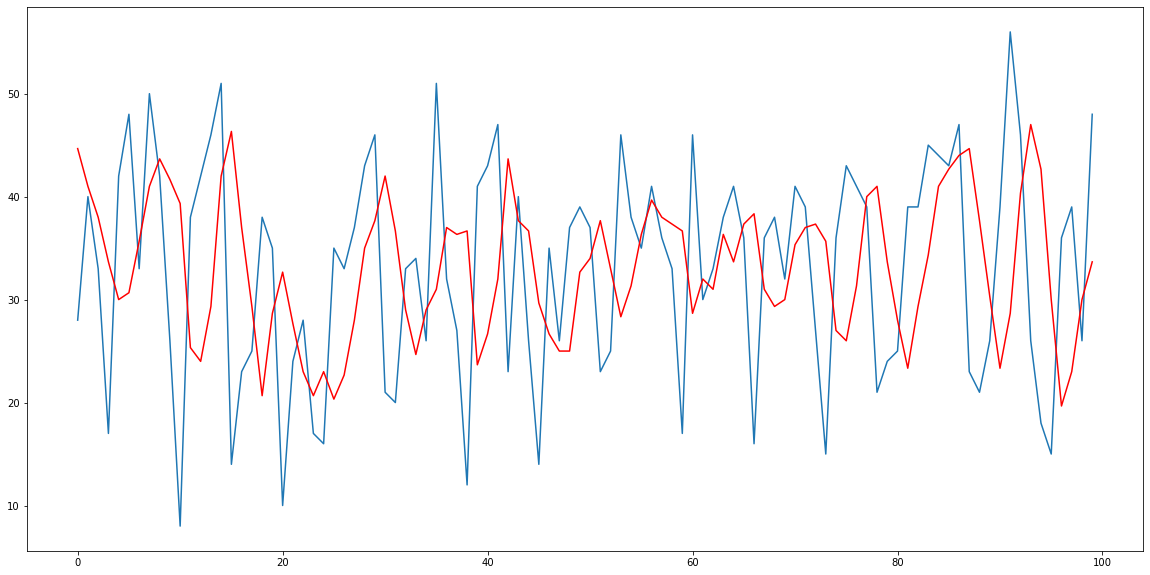

In [151]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
series = df.set_index('Date')
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()


In [166]:
frames2 = [getOccurrencesPerDay(df_2016[(df_2016.hora >= '05') & (df_2016.hora <= '12')]), getOccurrencesPerDay(df_2017[(df_2017.hora >= '05') & (df_2017.hora <= '12')])]

df_morning = pd.concat(frames2)
df_morning.sort_index(inplace=True)
df_morning.reset_index(inplace=True)
df_morning.columns=  ['Date', 'Total_Accident']
df_morning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            728 non-null    datetime64[ns]
 1   Total_Accident  728 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


predicted=6.333333, expected=6.000000
predicted=5.666667, expected=8.000000
predicted=6.666667, expected=7.000000
predicted=7.000000, expected=14.000000
predicted=9.666667, expected=18.000000
predicted=13.000000, expected=10.000000
predicted=14.000000, expected=5.000000
predicted=11.000000, expected=9.000000
predicted=8.000000, expected=14.000000
predicted=9.333333, expected=10.000000
predicted=11.000000, expected=5.000000
predicted=9.666667, expected=2.000000
predicted=5.666667, expected=9.000000
predicted=5.333333, expected=5.000000
predicted=5.333333, expected=15.000000
predicted=9.666667, expected=14.000000
predicted=11.333333, expected=9.000000
predicted=12.666667, expected=6.000000
predicted=9.666667, expected=4.000000
predicted=6.333333, expected=2.000000
predicted=4.000000, expected=11.000000
predicted=5.666667, expected=13.000000
predicted=8.666667, expected=13.000000
predicted=12.333333, expected=14.000000
predicted=13.333333, expected=9.000000
predicted=12.000000, expected=5

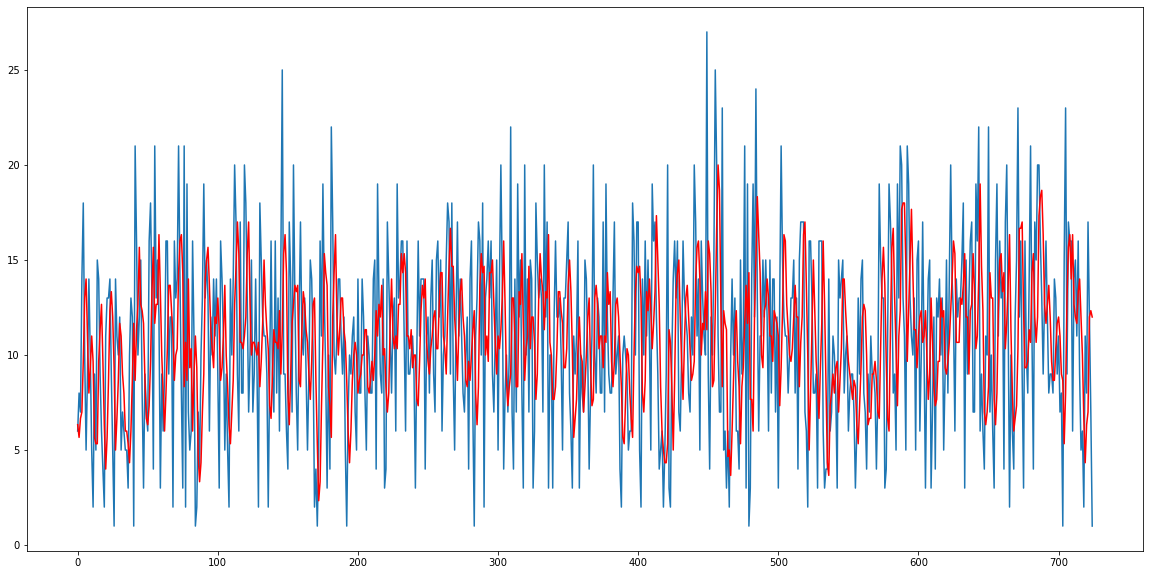

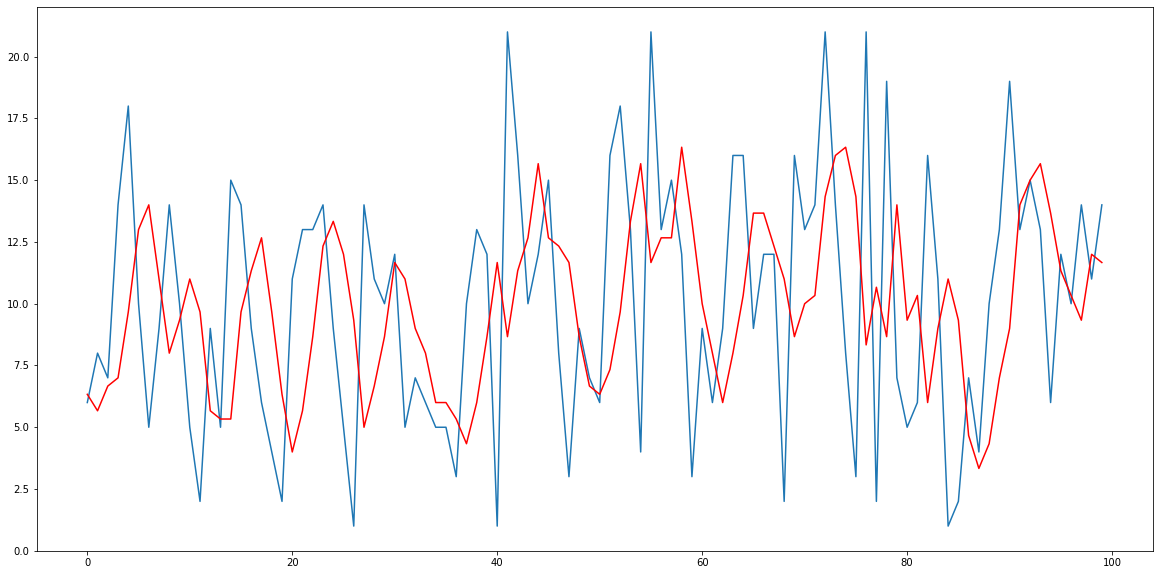

In [167]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
series = df_morning.set_index('Date')
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()


            Total_Accident
Date                      
2016-01-01             NaN
2016-01-02             NaN
2016-01-03        6.333333
2016-01-04        5.666667
2016-01-05        6.666667
2016-01-06        7.000000
2016-01-07        9.666667
2016-01-08       13.000000
2016-01-09       14.000000
2016-01-10       11.000000


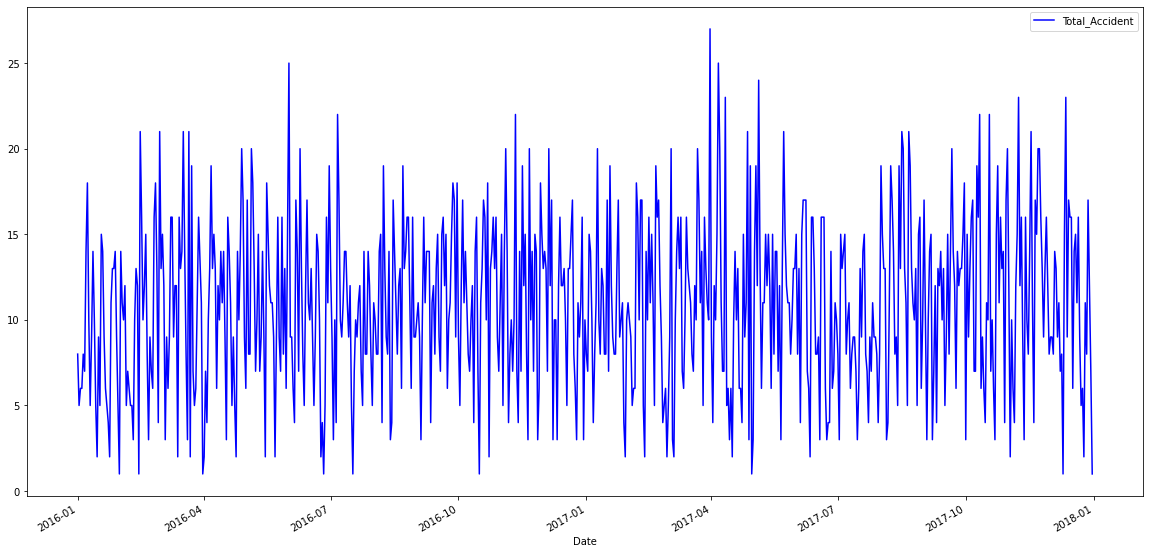

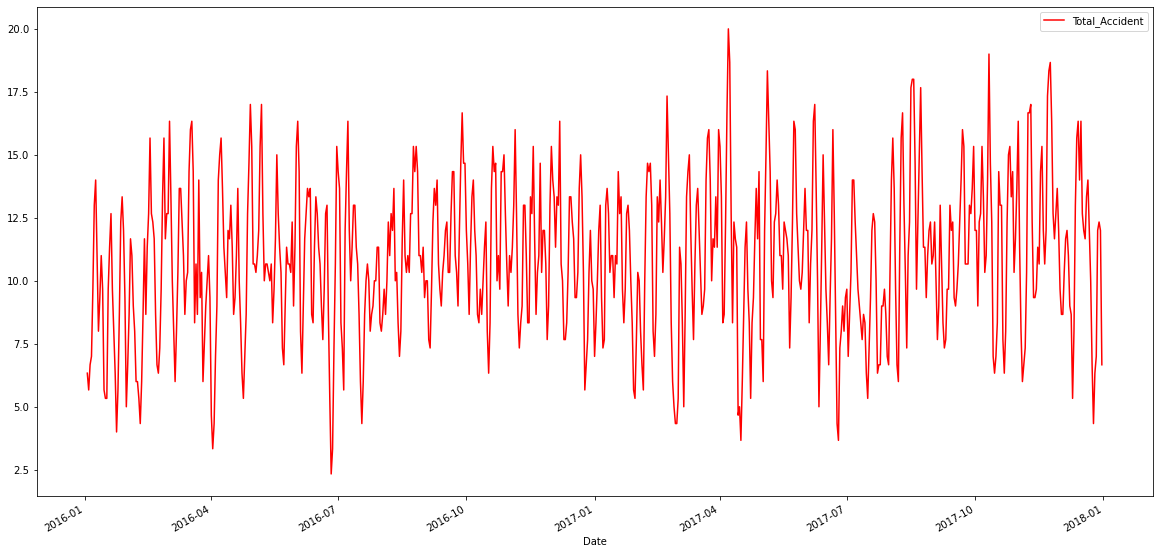

In [168]:
# tail-rolling average transform
series = df_morning.set_index('Date')
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot(color='blue')
rolling_mean.plot(color='red')
pyplot.show()



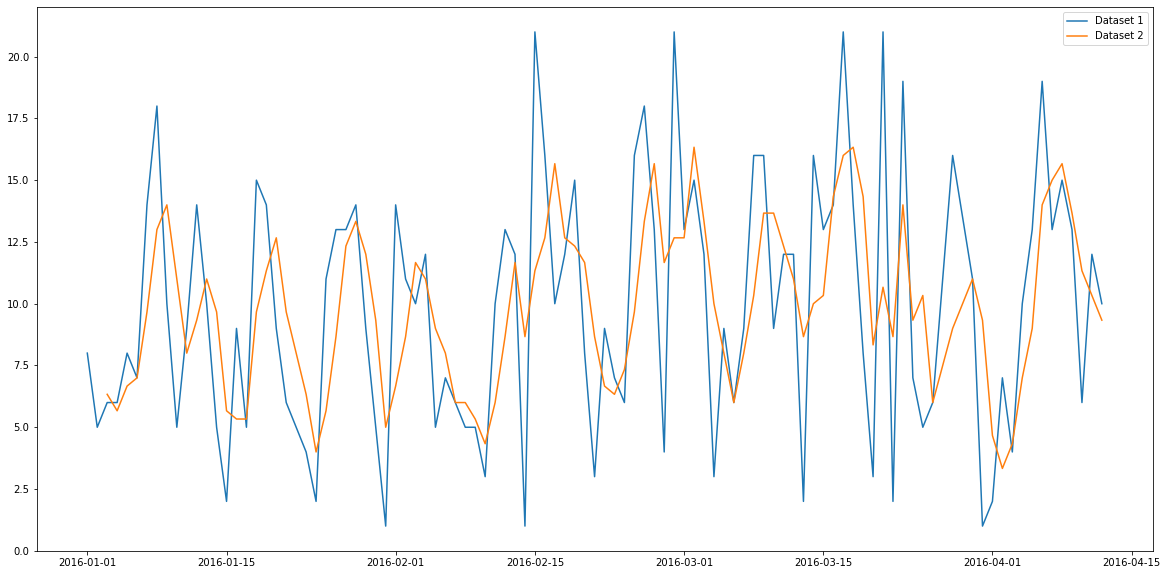

In [169]:
import matplotlib.pyplot as plt
# zoomed plot original and transformed dataset
plt.plot(series[:100])
plt.plot(rolling_mean[:100])

plt.legend(["Dataset 1", "Dataset 2"])
#series[:100].plot(color='blue')
#rolling_mean[:100].plot(color='red')
plt.show()

<ipython-input-170-9886fe4f0e3f>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(series, model='additive', freq=1)


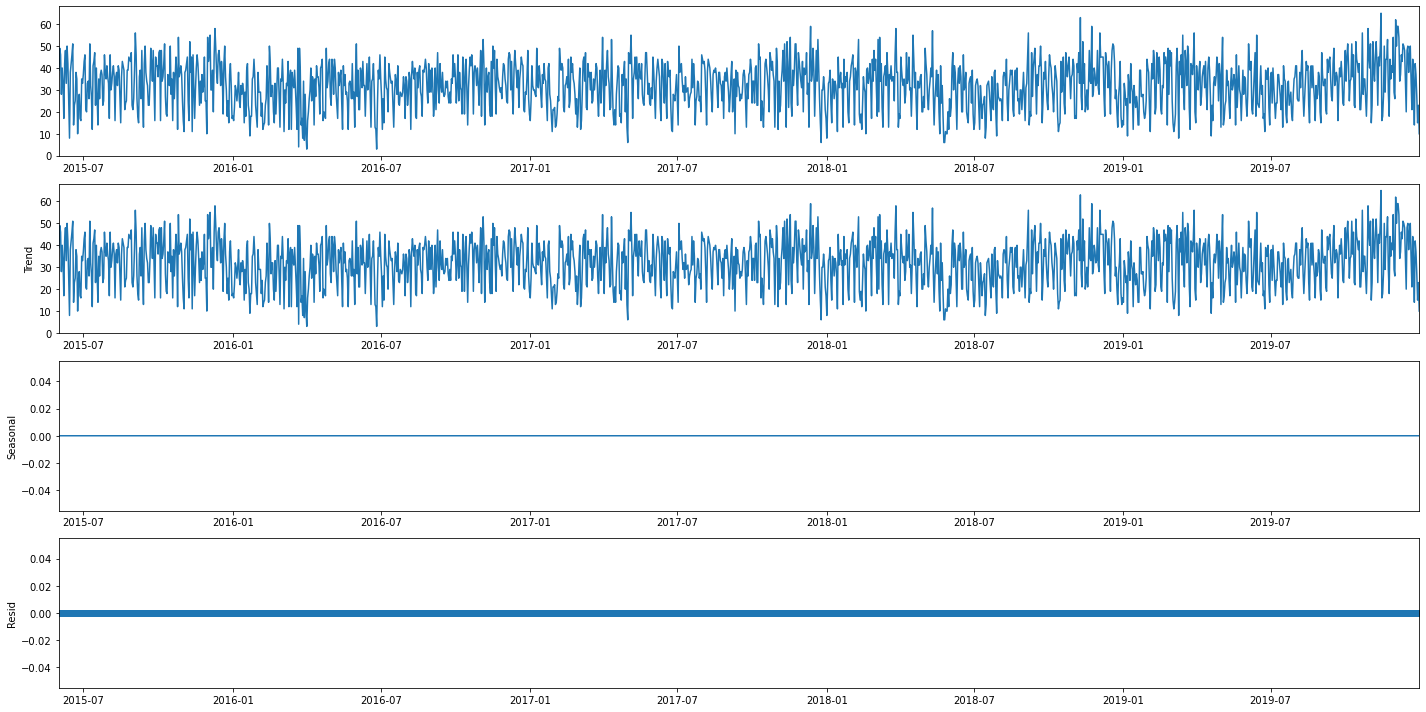

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df.set_index('Date')
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()


<ipython-input-171-d163bbdb6ff2>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(series, model='additive', freq=1)


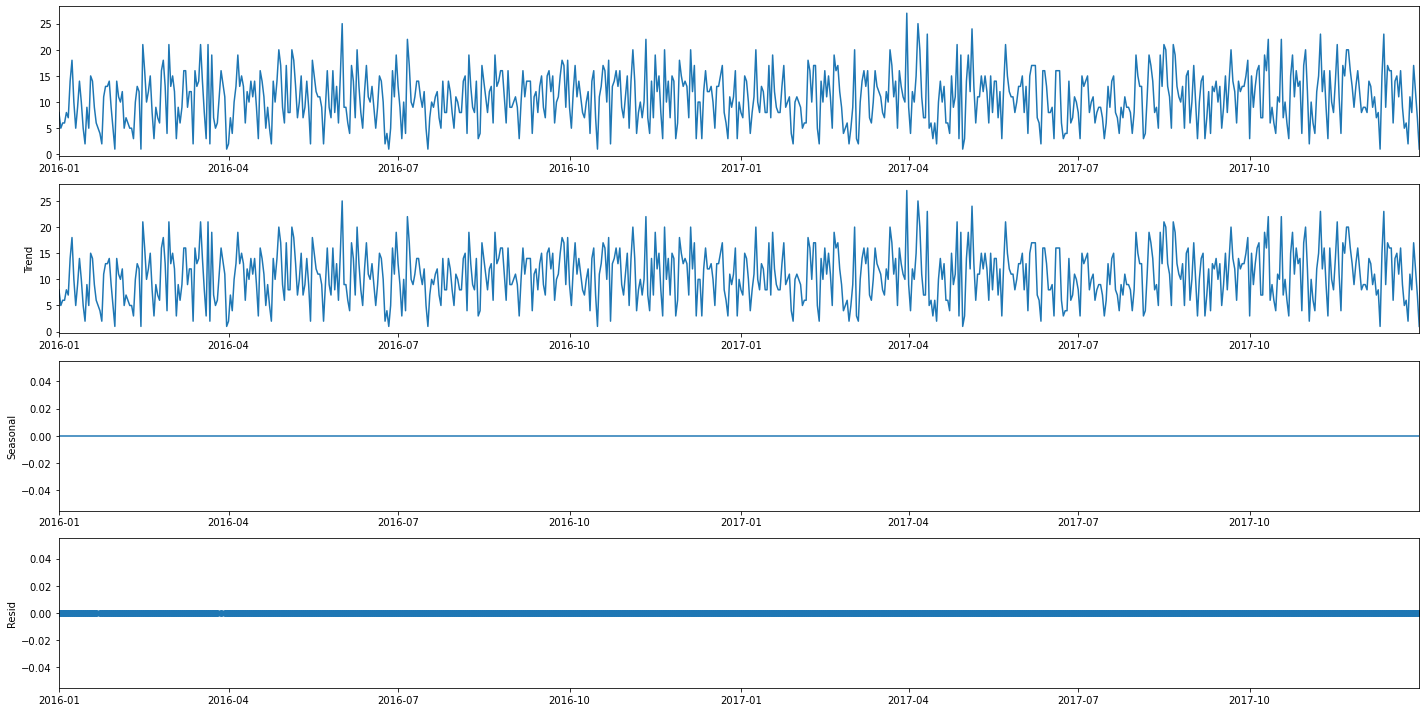

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df_morning.set_index('Date')
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()


<ipython-input-172-bc607800ebbd>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(series, model='multiplicative', freq=1)


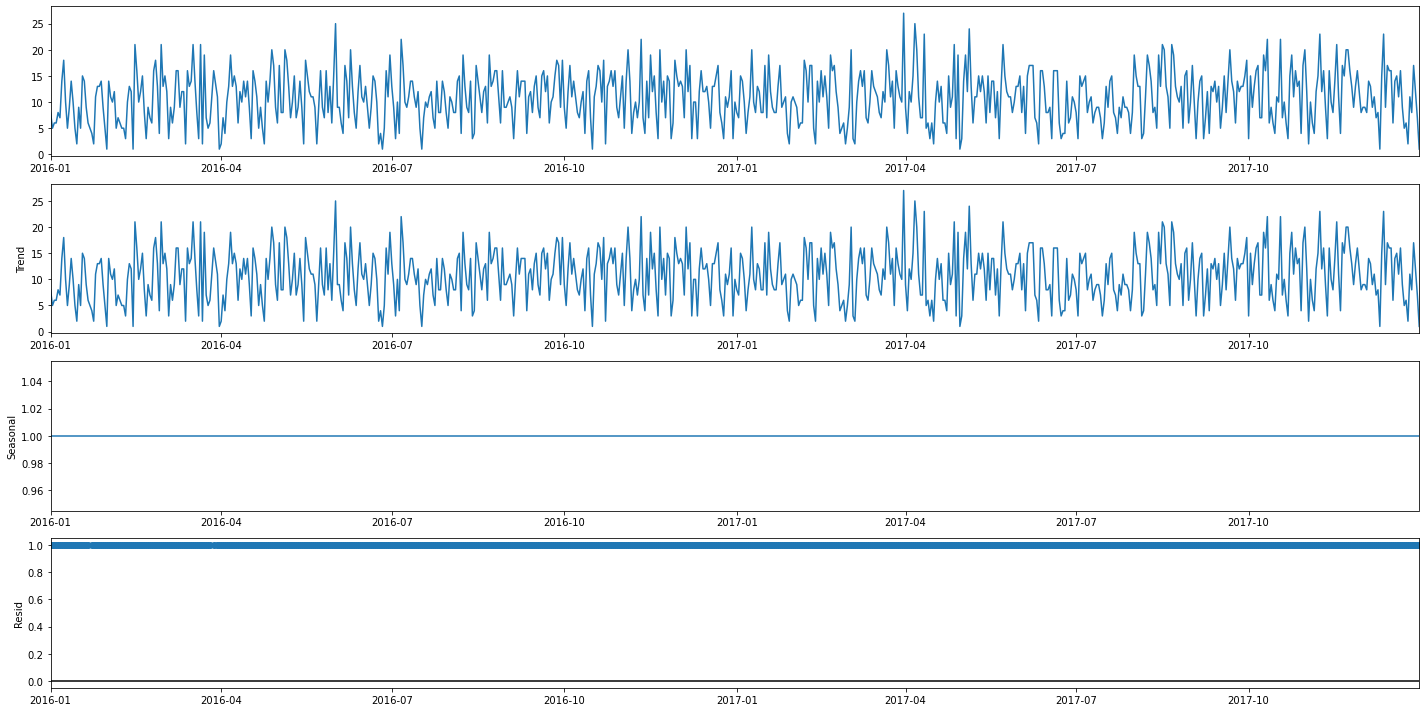

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df_morning.set_index('Date')
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()


<ipython-input-174-241d9935f15b>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


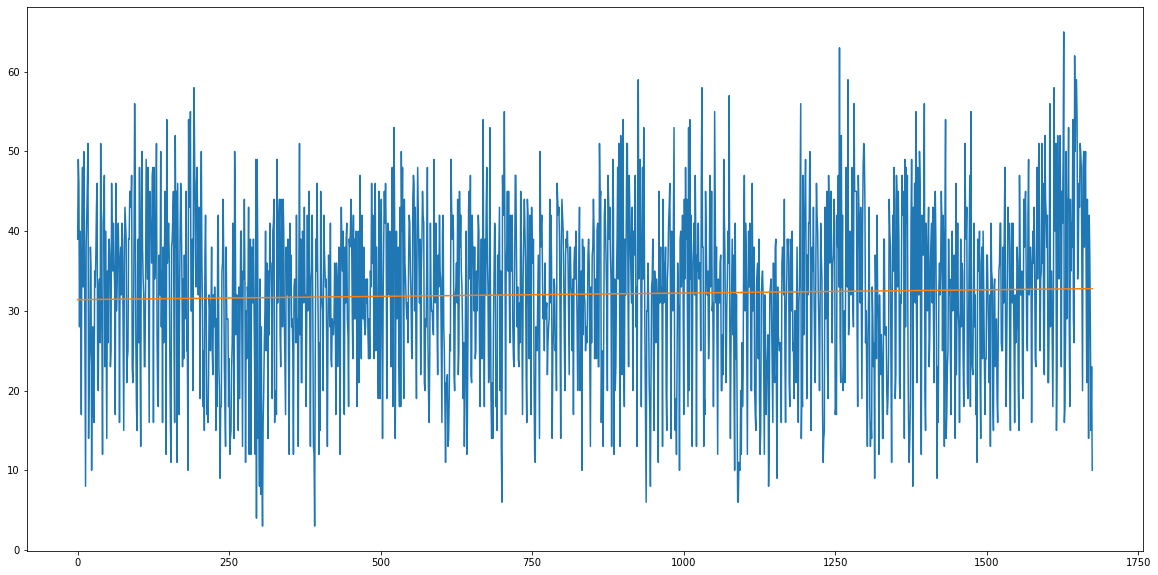

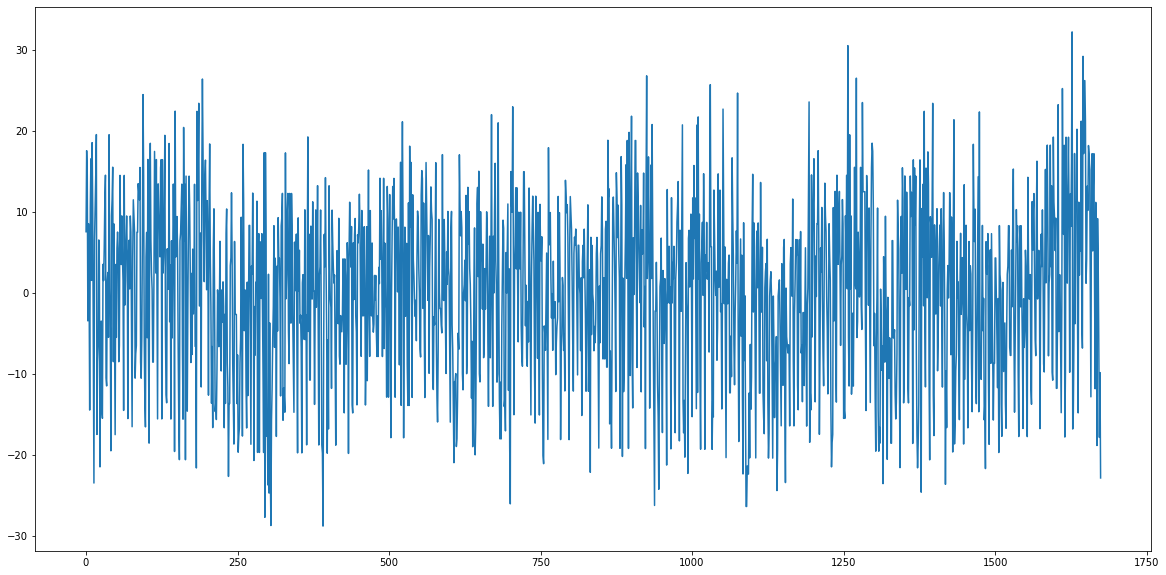

In [174]:
# use a linear model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
series = df.set_index('Date')
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()


            Total_Accident
Date                      
2015-06-30       32.533333
2015-07-31       33.354839
2015-08-31       33.806452
2015-09-30       34.533333
2015-10-31       34.806452
2015-11-30       31.600000
2015-12-31       37.161290
2016-01-31       26.354839
2016-02-29       27.517241
2016-03-31       27.354839
2016-04-30       29.766667
2016-05-31       30.451613
2016-06-30       31.033333


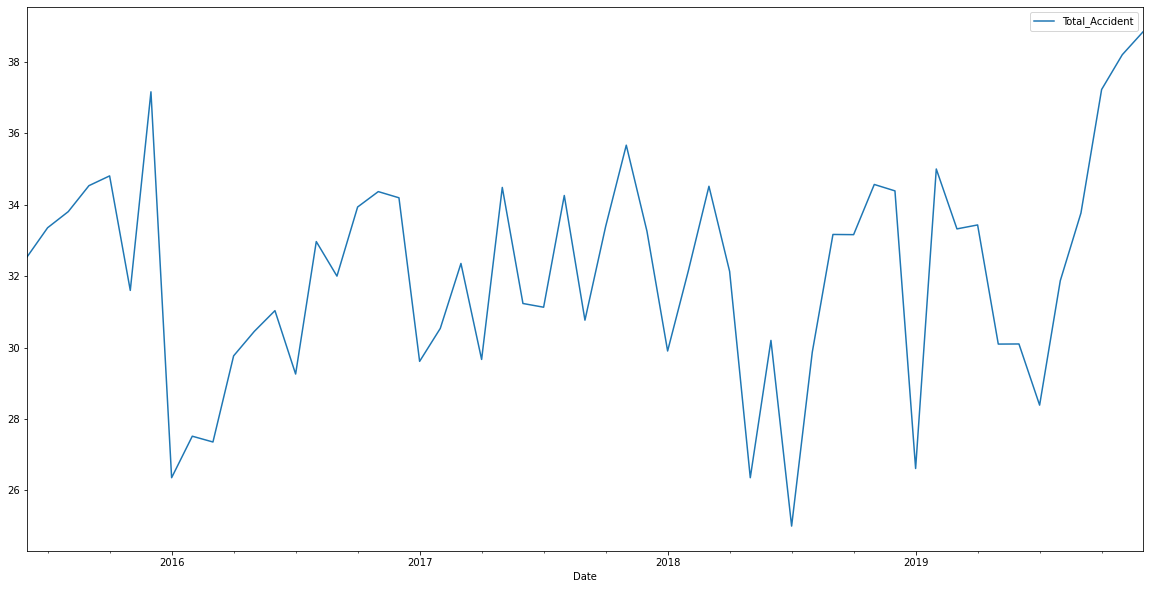

In [176]:
series = df.set_index('Date')
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

Coefficients: [[-5.72220405e-09]
 [ 4.10466257e-06]
 [-9.58320965e-04]
 [ 8.36219069e-02]
 [ 8.57540230e+00]]


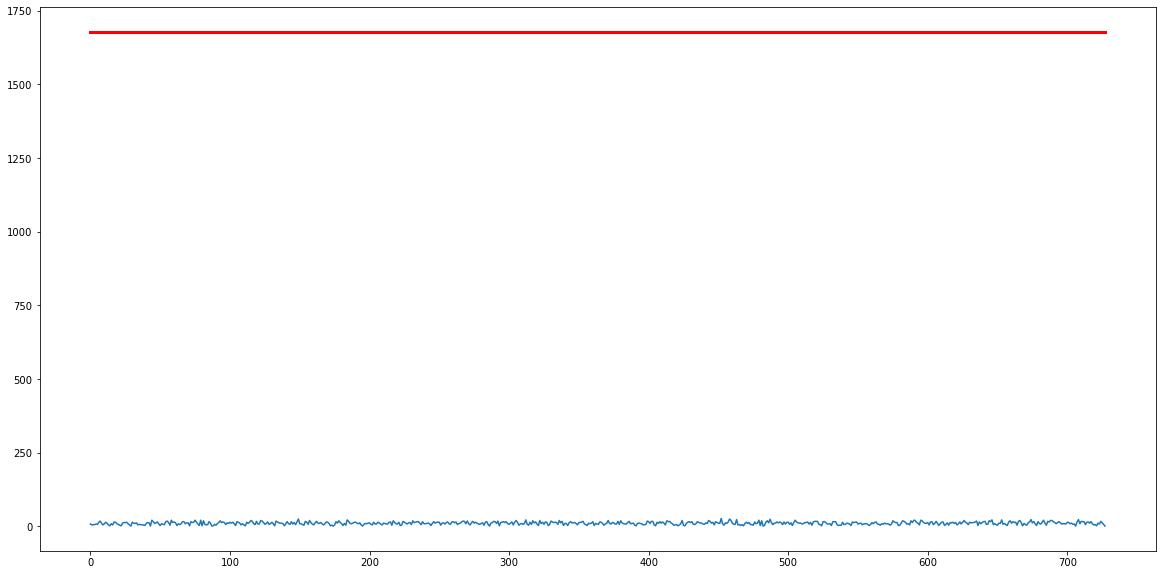

In [178]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = df_morning.set_index('Date')
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()


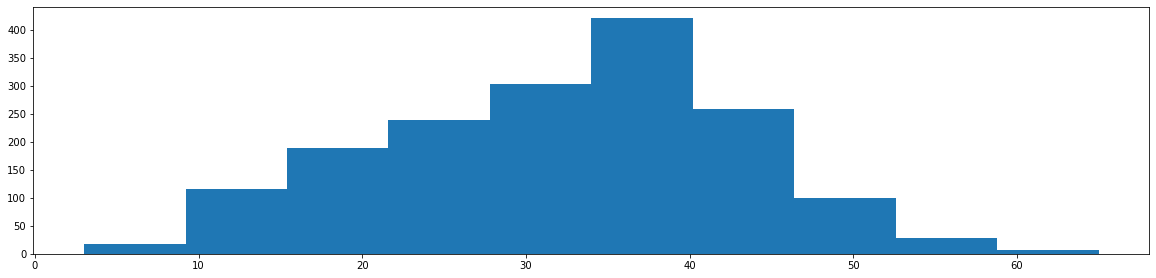

In [180]:
series = df.Total_Accident
pyplot.figure(1)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()


In [181]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = df.set_index('Date')
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -6.604700
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Test RMSE: 6.543


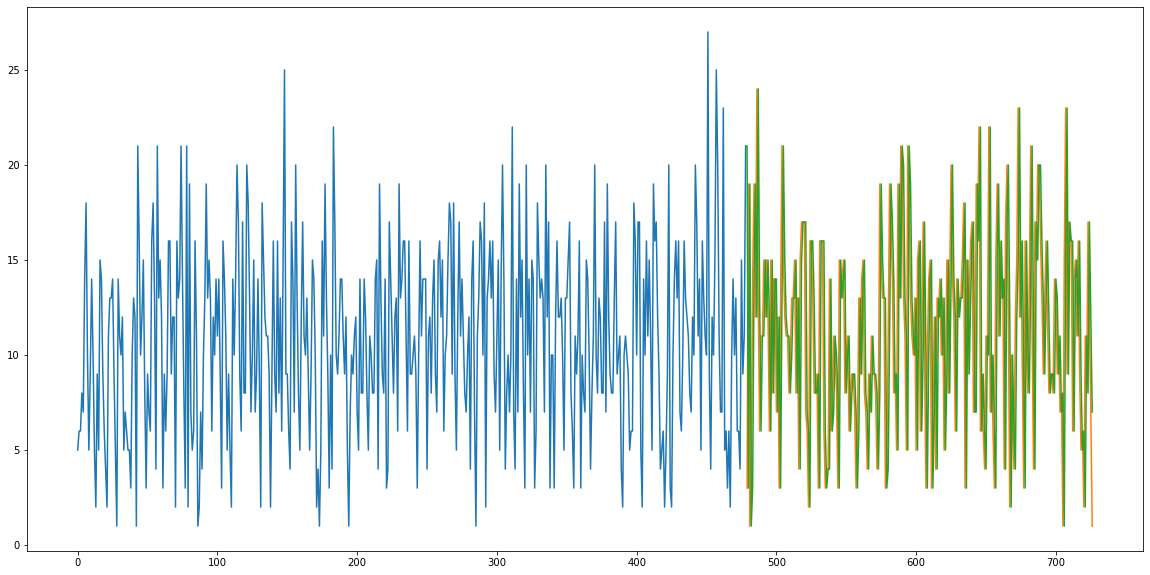

In [187]:
series = df_morning.set_index('Date')
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
#dataframe.dropna(inplace=True)

X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()


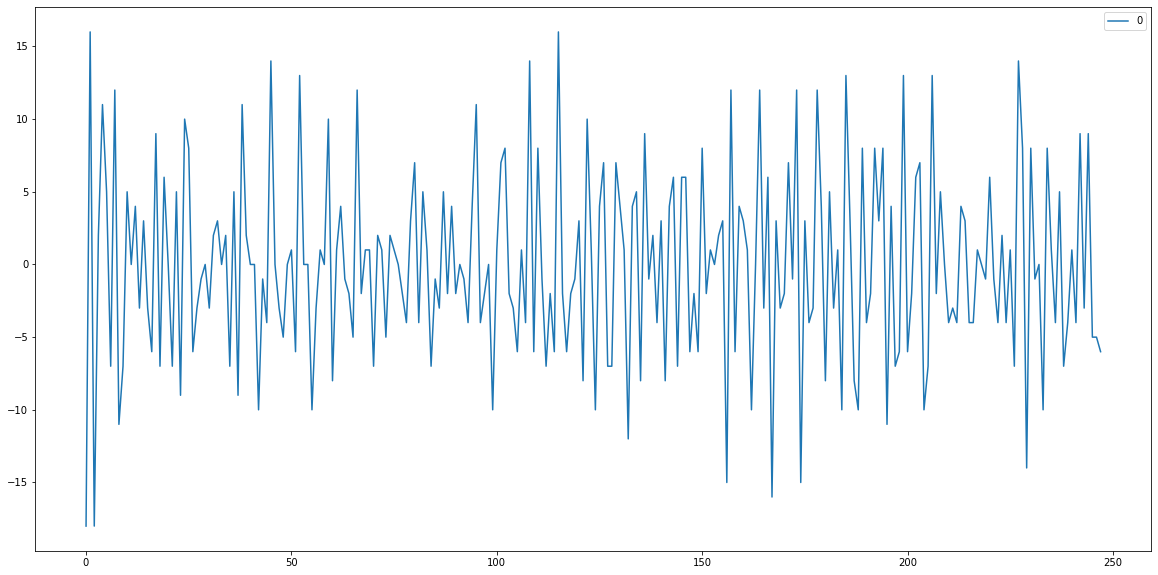

In [189]:
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# plot residuals
residuals.plot()
pyplot.show()



In [190]:
# summary statistics
print(residuals.describe())

                0
count  248.000000
mean    -0.080645
std      6.556014
min    -18.000000
25%     -4.000000
50%      0.000000
75%      4.000000
max     16.000000


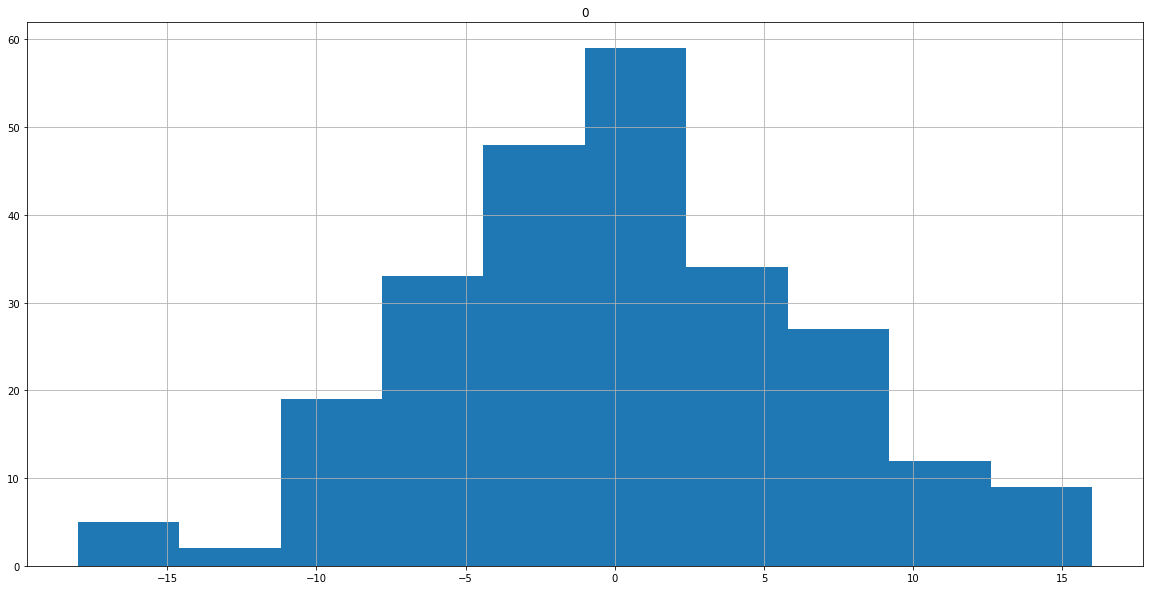

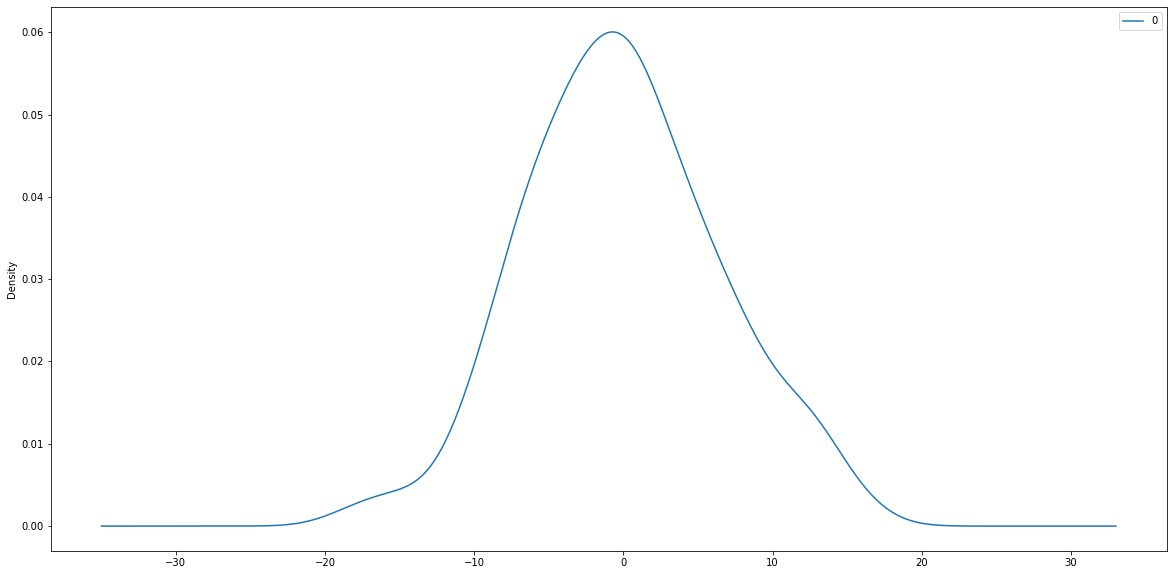

In [191]:
# histogram plot
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind='kde')
pyplot.show()

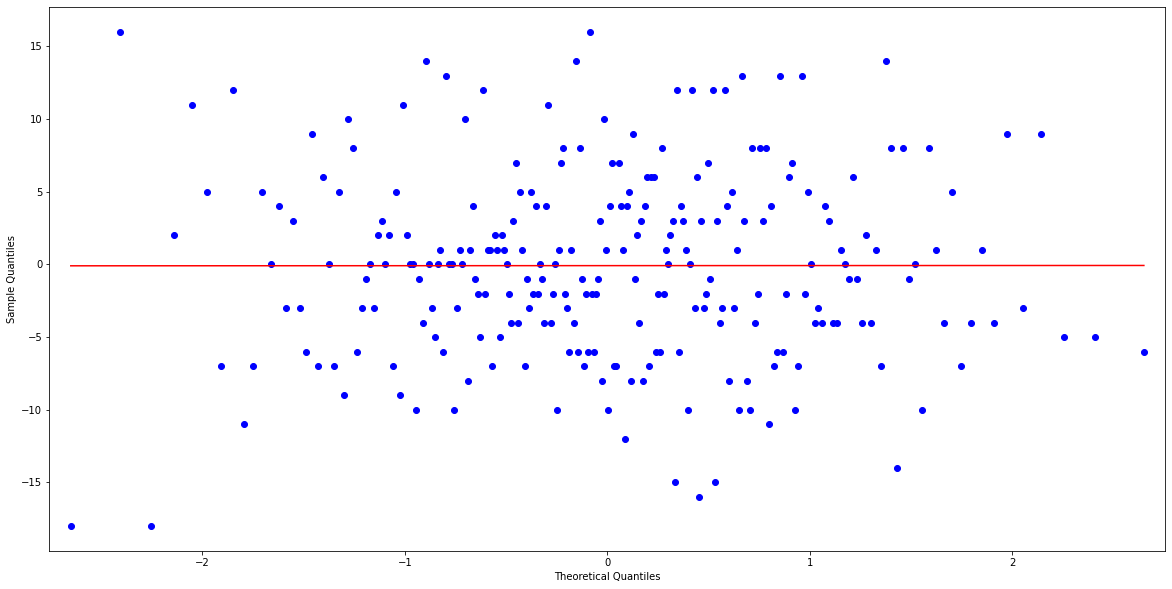

In [192]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='r')
pyplot.show()


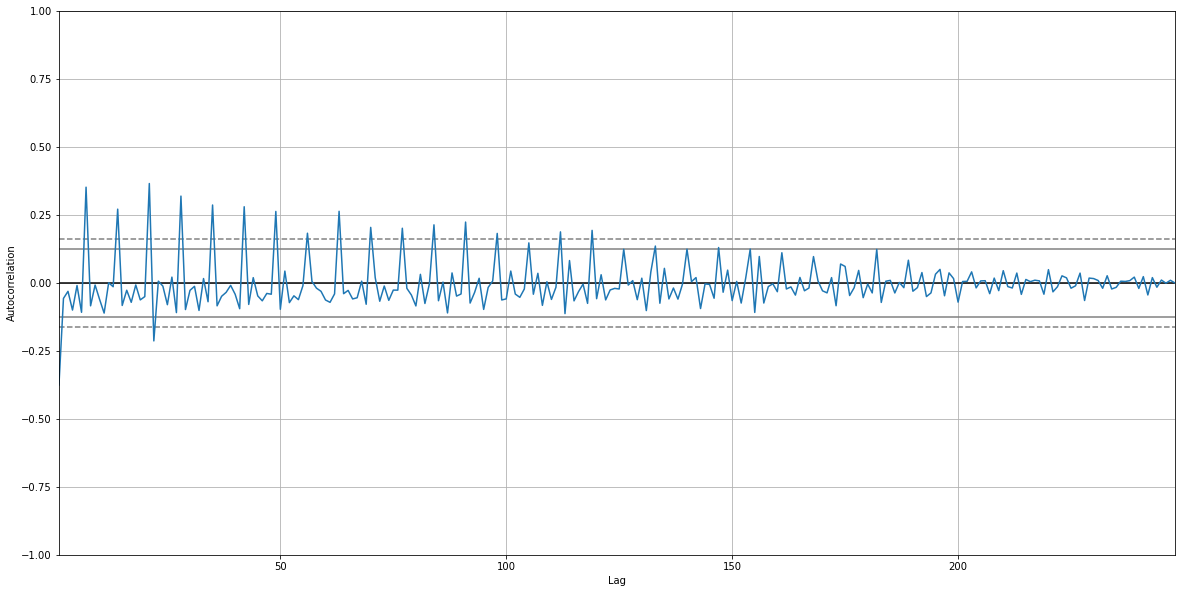

In [193]:

autocorrelation_plot(residuals)
pyplot.show()


C:\Users\joaog\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Lag: 20
Coefficients: [ 1.03565574e+01  9.09199132e-02 -3.78566710e-02  2.74739714e-02
 -5.55603010e-02 -4.60120337e-02 -1.67464701e-03  2.20513094e-01
 -1.37282730e-02 -7.51153792e-03 -9.05132583e-02 -3.40898217e-02
 -4.59314212e-02  2.01994104e-02  1.98965822e-01 -3.32157253e-02
 -5.81886058e-02 -4.84550118e-02  1.48781168e-02 -3.00027304e-02
 -1.51852011e-02]
predicted=12.290741, expected=2.000000
predicted=13.876946, expected=11.000000
predicted=11.081045, expected=8.000000
predicted=12.665855, expected=17.000000
predicted=11.449871, expected=12.000000
predicted=9.809615, expected=7.000000
predicted=6.969325, expected=1.000000
Test RMSE: 5.159


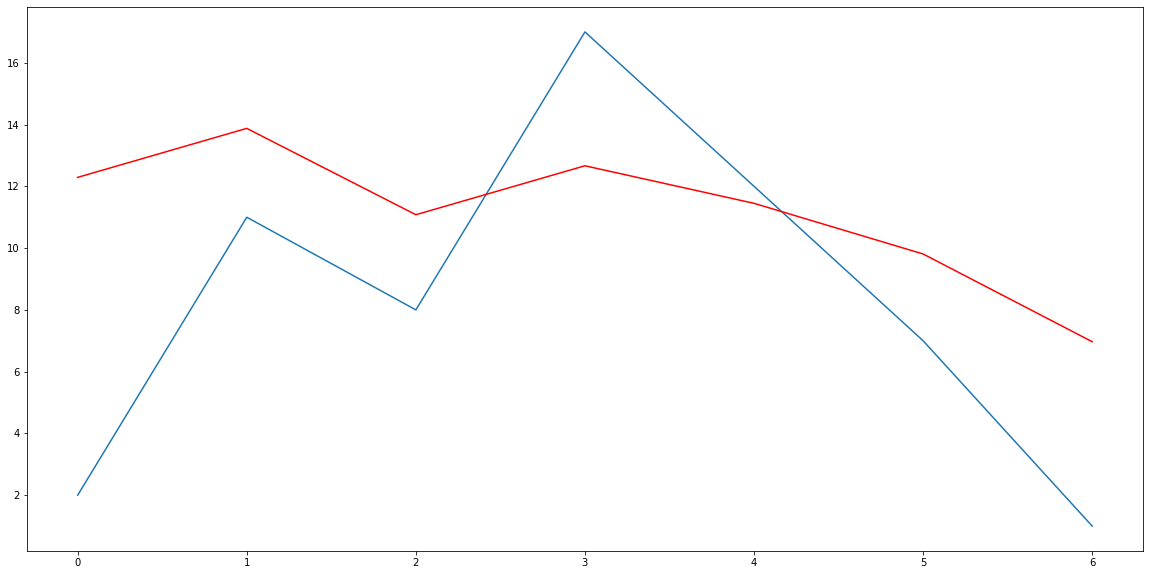

In [196]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = df_morning.set_index('Date')
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=12.290741, expected=2.000000
predicted=12.941313, expected=11.000000
predicted=11.209047, expected=8.000000
predicted=12.211910, expected=17.000000
predicted=12.453285, expected=12.000000
predicted=10.244250, expected=7.000000
predicted=7.132916, expected=1.000000
Test RMSE: 5.227


C:\Users\joaog\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


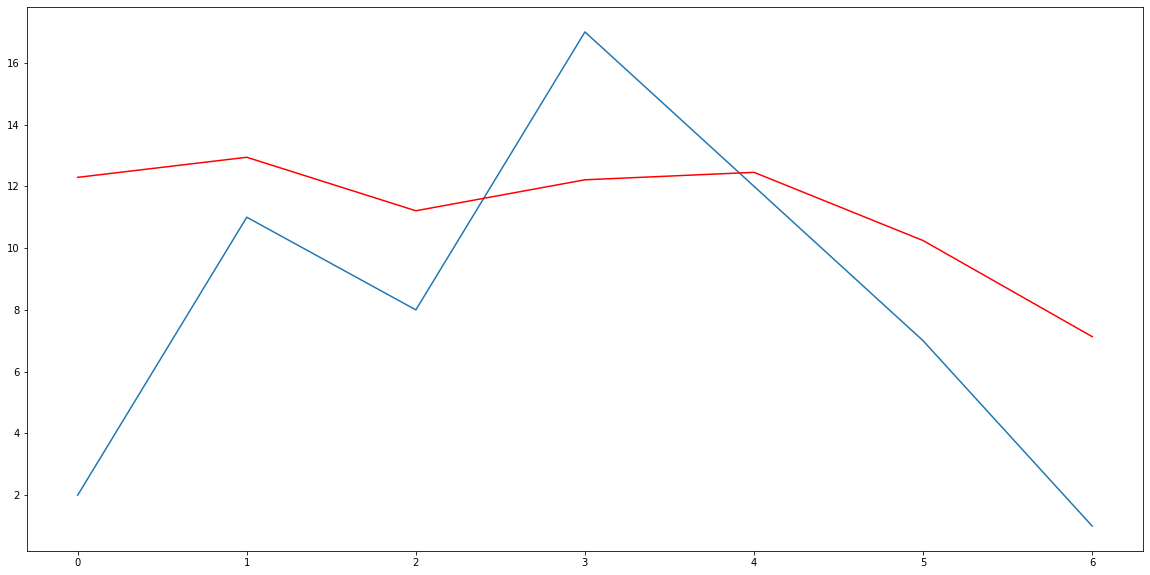

In [197]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

series = df_morning.set_index('Date')
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [198]:
# calculate residual errors for a persistence forecast model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = df.set_index('Date')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())


Test RMSE: 13.577
      0
0 -13.0
1  21.0
2   7.0
3  -7.0
4   8.0


In [199]:
# autoregressive model of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
series = df.set_index('Date')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=22, Coef=[-0.05450476 -0.79184362 -0.73915547 -0.65535889 -0.69274685 -0.65009001
 -0.558898   -0.32114158 -0.35299641 -0.34807127 -0.35906599 -0.35083995
 -0.39752569 -0.3691027  -0.17803832 -0.200029   -0.18983492 -0.20982576
 -0.15927374 -0.16670746 -0.18077597  0.05912656  0.07123301]


C:\Users\joaog\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


C:\Users\joaog\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


predicted=8.546689, expected=3.000000
predicted=5.884060, expected=19.000000
predicted=9.323165, expected=1.000000
predicted=8.859056, expected=3.000000
predicted=9.323454, expected=14.000000
predicted=11.250100, expected=19.000000
predicted=12.372410, expected=12.000000
predicted=8.858686, expected=24.000000
predicted=13.327102, expected=13.000000
predicted=6.283730, expected=6.000000
predicted=10.560295, expected=11.000000
predicted=10.846933, expected=11.000000
predicted=12.616492, expected=15.000000
predicted=14.711933, expected=12.000000
predicted=12.833941, expected=15.000000
predicted=14.166607, expected=12.000000
predicted=7.938855, expected=6.000000
predicted=7.464372, expected=15.000000
predicted=14.020347, expected=8.000000
predicted=12.703681, expected=14.000000
predicted=13.324722, expected=14.000000
predicted=15.550745, expected=7.000000
predicted=10.422120, expected=12.000000
predicted=9.909998, expected=3.000000
predicted=10.650332, expected=13.000000
predicted=11.22843

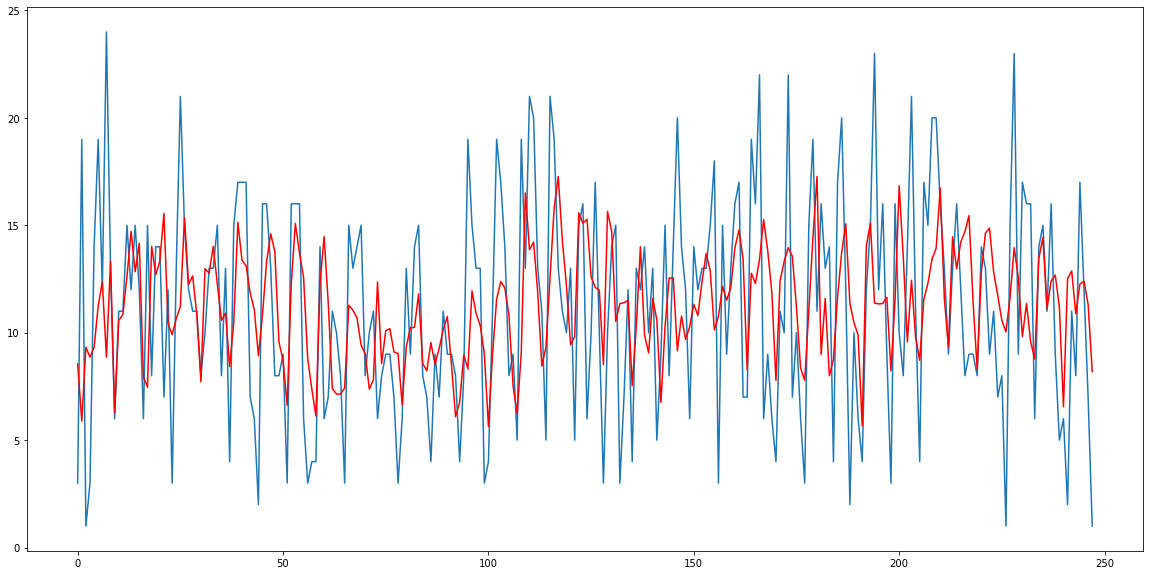

In [201]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = df_morning.set_index('Date')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()


In [203]:
frames3 = [getOccurrencesPerDay(df_2015[(df_2015.hora >= '17') & (df_2015.hora <= '22')]),
           getOccurrencesPerDay(df_2016[(df_2016.hora >= '17') & (df_2016.hora <= '22')]), 
           getOccurrencesPerDay(df_2017[(df_2017.hora >= '17') & (df_2017.hora <= '22')]),
           getOccurrencesPerDay(df_2018[(df_2018.hora >= '17') & (df_2018.hora <= '22')]), 
           getOccurrencesPerDay(df_2019[(df_2019.hora >= '17') & (df_2019.hora <= '22')])]

df_night = pd.concat(frames3)
df_night.sort_index(inplace=True)
df_night.reset_index(inplace=True)
df_night.columns=  ['Date', 'Total_Accident']
df_night.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1663 non-null   datetime64[ns]
 1   Total_Accident  1663 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 26.1 KB


C:\Users\joaog\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


predicted=6.376393, expected=13.000000
predicted=6.454206, expected=8.000000
predicted=5.909653, expected=15.000000
predicted=5.844786, expected=7.000000
predicted=4.283887, expected=4.000000
predicted=4.479248, expected=1.000000
predicted=5.005137, expected=6.000000
predicted=6.651100, expected=12.000000
predicted=6.646448, expected=1.000000
predicted=7.017078, expected=14.000000
predicted=6.895753, expected=4.000000
predicted=5.629694, expected=7.000000
predicted=5.602056, expected=2.000000
predicted=6.763882, expected=8.000000
predicted=8.808689, expected=10.000000
predicted=7.188265, expected=8.000000
predicted=8.653571, expected=3.000000
predicted=5.754969, expected=7.000000
predicted=6.187302, expected=5.000000
predicted=4.438208, expected=3.000000
predicted=7.443131, expected=4.000000
predicted=8.057415, expected=11.000000
predicted=7.941545, expected=13.000000
predicted=8.384981, expected=6.000000
predicted=6.086798, expected=4.000000
predicted=5.574162, expected=6.000000
predi

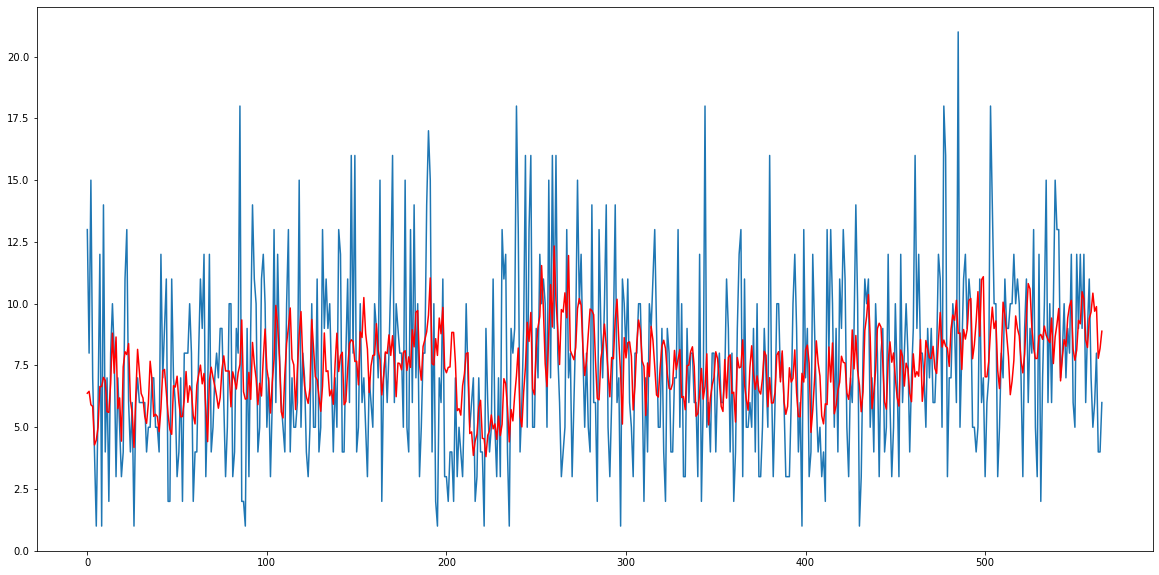

In [205]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = df_night.set_index('Date')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()


<ipython-input-206-33b27c263ef5>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=5.460787, expected=13.000000
predicted=8.282450, expected=8.000000
predicted=7.105472, expected=15.000000
predicted=8.893671, expected=7.000000
predicted=7.290279, expected=4.000000
predicted=7.797880, expected=1.000000
predicted=7.243752, expected=6.000000
predicted=7.016505, expected=12.000000
predicted=9.010916, expected=1.000000
predicted=4.826540, expected=14.000000
predicted=7.019756, expected=4.000000
predicted=5.313393, expected=7.000000
predicted=7.482647, expected=2.000000
predicted=6.165433, expected=8.000000
predicted=5.995788, expected=10.000000
predicted=8.398168, expected=8.000000
predicted=6.630854, expected=3.000000
predicted=5.756516, expected=7.000000
predicted=5.902964, expected=5.000000
predicted=6.753001, expected=3.000000
predicted=6.099045, expected=4.000000
predicted=5.009679, expected=11.000000
predicted=6.044492, expected=13.000000
predicted=8.052955, expected=6.000000
predicted=6.652252, expected=4.000000
predicted=5.839061, expected=6.000000
predi

predicted=5.416117, expected=6.000000
predicted=5.629068, expected=7.000000
predicted=6.868704, expected=2.000000
predicted=6.034421, expected=3.000000
predicted=4.795298, expected=7.000000
predicted=5.199194, expected=4.000000
predicted=5.052711, expected=4.000000
predicted=4.618298, expected=1.000000
predicted=2.823618, expected=9.000000
predicted=5.155679, expected=6.000000
predicted=5.532845, expected=4.000000
predicted=4.627449, expected=5.000000
predicted=4.441244, expected=11.000000
predicted=6.311277, expected=5.000000
predicted=6.800664, expected=3.000000
predicted=5.257338, expected=7.000000
predicted=5.546759, expected=3.000000
predicted=5.442854, expected=13.000000
predicted=8.236307, expected=11.000000
predicted=7.323132, expected=12.000000
predicted=8.409263, expected=4.000000
predicted=7.269951, expected=1.000000
predicted=5.983198, expected=9.000000
predicted=8.743426, expected=8.000000
predicted=8.265625, expected=9.000000
predicted=8.014234, expected=18.000000
predict

predicted=7.575863, expected=14.000000
predicted=7.958814, expected=10.000000
predicted=8.088217, expected=1.000000
predicted=6.605300, expected=3.000000
predicted=6.091088, expected=8.000000
predicted=7.889615, expected=11.000000
predicted=9.306350, expected=10.000000
predicted=7.808988, expected=11.000000
predicted=7.033201, expected=5.000000
predicted=6.977993, expected=7.000000
predicted=8.289485, expected=4.000000
predicted=7.710688, expected=10.000000
predicted=8.525124, expected=8.000000
predicted=7.947725, expected=3.000000
predicted=5.669387, expected=8.000000
predicted=6.558962, expected=9.000000
predicted=7.153136, expected=4.000000
predicted=7.067554, expected=5.000000
predicted=5.895033, expected=12.000000
predicted=7.164931, expected=6.000000
predicted=7.502778, expected=3.000000
predicted=6.111338, expected=5.000000
predicted=5.223378, expected=10.000000
predicted=7.347004, expected=7.000000
predicted=7.787224, expected=3.000000
predicted=5.187292, expected=12.000000
pre

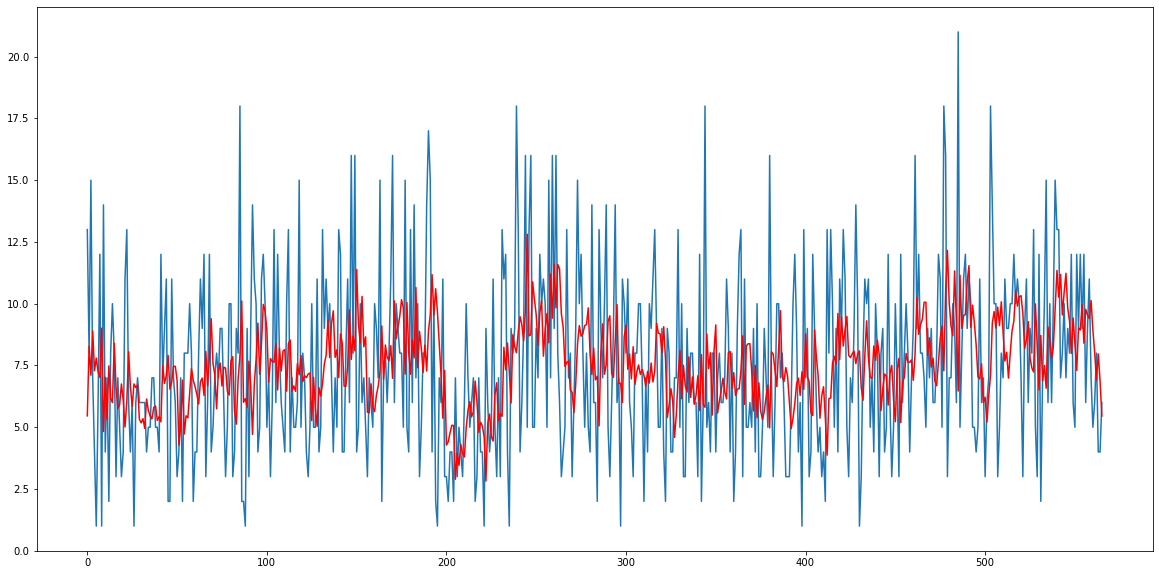

In [206]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

series = df_night.set_index('Date')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [254]:
df_bairros = pd.read_csv("../dataset/bairros_recife.csv")
df_bairros.Bairros = df_bairros.Bairros.apply(lambda b: b.split(', '))
df_bairros

RPA                                            Bairros
0    Centro  [recife, santo amaro, boa vista, cabanga, ilha...
1     Norte  [arruda, campina do barreto, campo grande, enc...
2  Noroeste  [aflitos, alto do mandu, apipucos, casa amarel...
3     Oeste  [cordeiro, ilha do retiro, iputinga, madalena,...
4  Sudoeste  [afogados, bongi, mangueira, mustardinha, san ...
5       Sul  [boa viagem, brasilia teimosa, imbiribeira, ip...

In [260]:
import unidecode
dfb_2015 = df_2015[df_2015.bairro.isnull() == False]
dfb_2015 = dfb_2015[dfb_2015.bairro != 'marcelo']
dfb_2015.bairro = dfb_2015.bairro.apply(lambda b: unidecode.unidecode(b.lower()))

dfb_2016 = df_2016[df_2016.bairro.isnull() == False]
dfb_2016.bairro = dfb_2016.bairro.apply(lambda b: unidecode.unidecode(b.lower()))

dfb_2017 = df_2017[df_2017.bairro.isnull() == False]
dfb_2017 = dfb_2017[dfb_2017.bairro != 'fabio']
dfb_2017.bairro = dfb_2017.bairro.apply(lambda b: unidecode.unidecode(b.lower()))

dfb_2018 = df_2018[df_2018.bairro.isnull() == False]
dfb_2018.bairro = dfb_2018.bairro.apply(lambda b: unidecode.unidecode(b.lower()))

dfb_2019 = df_2019[df_2019.bairro.isnull() == False]
dfb_2019.bairro = dfb_2019.bairro.apply(lambda b: unidecode.unidecode(b.lower()))

C:\Users\joaog\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [261]:
df_bairros

RPA                                            Bairros
0    Centro  [recife, santo amaro, boa vista, cabanga, ilha...
1     Norte  [arruda, campina do barreto, campo grande, enc...
2  Noroeste  [aflitos, alto do mandu, apipucos, casa amarel...
3     Oeste  [cordeiro, ilha do retiro, iputinga, madalena,...
4  Sudoeste  [afogados, bongi, mangueira, mustardinha, san ...
5       Sul  [boa viagem, brasilia teimosa, imbiribeira, ip...

In [274]:
def searchRPA(bairro):
    for count in range (0, 6):
        if bairro in df_bairros.iloc[count].Bairros:
            return df_bairros.iloc[count].RPA
        
dfb_2015 = df_2015[df_2015.bairro.isnull() == False]
dfb_2015.bairro = dfb_2015.bairro.apply(lambda b: unidecode.unidecode(b.lower()))
        
dfb_2015['RPA'] = dfb_2015.bairro.apply(lambda b: searchRPA(b))
dfb_2015 = dfb_2015[['data', 'hora', 'RPA']]
dfb_2015.dropna(inplace=True)

dfb_2016['RPA'] = dfb_2016.bairro.apply(lambda b: searchRPA(b))
dfb_2016 = dfb_2016[['data', 'hora', 'RPA']]
dfb_2016.dropna(inplace=True)

dfb_2017['RPA'] = dfb_2017.bairro.apply(lambda b: searchRPA(b))
dfb_2017 = dfb_2017[['data', 'hora', 'RPA']]
dfb_2017.dropna(inplace=True)

dfb_2018['RPA'] = dfb_2018.bairro.apply(lambda b: searchRPA(b))
dfb_2018 = dfb_2018[['data', 'hora', 'RPA']]
dfb_2018.dropna(inplace=True)

dfb_2019['RPA'] = dfb_2019.bairro.apply(lambda b: searchRPA(b))
dfb_2019 = dfb_2019[['data', 'hora', 'RPA']]
dfb_2019.dropna(inplace=True)

C:\Users\joaog\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-274-bbb32117299f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb_2015['RPA'] = dfb_2015.bairro.apply(lambda b: searchRPA(b))
<ipython-input-274-bbb32117299f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [309]:
def searchTurno(h):
    if (is_date(h) == False):
        return 'remove'
    h = int(h.split(':')[0])
    if (h >= 5 and h < 12):
        return 'manha'
    if (h >= 12 and h < 17):
        return 'tarde'
    if (h >= 17 and h < 22):
        return 'noite'
    else:
        return 'madrugada'

    
frames5 = [dfb_2015, dfb_2016, dfb_2017, dfb_2018, dfb_2019]

all_df = pd.concat(frames5)
all_df['turno'] = all_df.hora.apply(lambda h: searchTurno(h))
all_df = all_df[all_df.turno != 'remove']

all_df = all_df[['data', 'RPA', 'turno']]
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53408 entries, 0 to 12061
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    53408 non-null  datetime64[ns]
 1   RPA     53408 non-null  object        
 2   turno   53408 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ MB


In [311]:
all_df.turno.value_counts()

manha        18747
tarde        18203
noite        12442
madrugada     4016
Name: turno, dtype: int64

In [312]:
all_df[all_df.turno.isnull()]

Empty DataFrame
Columns: [data, RPA, turno]
Index: []

In [300]:
from dateutil.parser import parse

def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False
    

In [323]:
all_df.RPA.value_counts()

Sul         14672
Noroeste     9606
Oeste        8973
Centro       8804
Sudoeste     6767
Norte        4586
Name: RPA, dtype: int64

In [324]:
manha_sul = getOccurrencesPerDay(all_df[(all_df.turno == 'manha') & (all_df.RPA == 'Sul')])
manha_sul.sort_index(inplace=True)
manha_sul.reset_index(inplace=True)
manha_sul.columns=  ['Date', 'Total_Accident']
manha_sul = manha_sul.set_index('Date')

manha_noroeste = getOccurrencesPerDay(all_df[(all_df.turno == 'manha') & (all_df.RPA == 'Noroeste')])
manha_noroeste.sort_index(inplace=True)
manha_noroeste.reset_index(inplace=True)
manha_noroeste.columns=  ['Date', 'Total_Accident']
manha_noroeste = manha_noroeste.set_index('Date')

manha_oeste = getOccurrencesPerDay(all_df[(all_df.turno == 'manha') & (all_df.RPA == 'Oeste')])
manha_oeste.sort_index(inplace=True)
manha_oeste.reset_index(inplace=True)
manha_oeste.columns=  ['Date', 'Total_Accident']
manha_oeste = manha_oeste.set_index('Date')

manha_centro = getOccurrencesPerDay(all_df[(all_df.turno == 'manha') & (all_df.RPA == 'Centro')])
manha_centro.sort_index(inplace=True)
manha_centro.reset_index(inplace=True)
manha_centro.columns=  ['Date', 'Total_Accident']
manha_centro = manha_centro.set_index('Date')

manha_sudoeste = getOccurrencesPerDay(all_df[(all_df.turno == 'manha') & (all_df.RPA == 'Sudoeste')])
manha_sudoeste.sort_index(inplace=True)
manha_sudoeste.reset_index(inplace=True)
manha_sudoeste.columns=  ['Date', 'Total_Accident']
manha_sudoeste = manha_sudoeste.set_index('Date')

manha_norte = getOccurrencesPerDay(all_df[(all_df.turno == 'manha') & (all_df.RPA == 'Norte')])
manha_norte.sort_index(inplace=True)
manha_norte.reset_index(inplace=True)
manha_norte.columns=  ['Date', 'Total_Accident']
manha_norte = manha_norte.set_index('Date')

In [325]:
tarde_sul = getOccurrencesPerDay(all_df[(all_df.turno == 'tarde') & (all_df.RPA == 'Sul')])
tarde_sul.sort_index(inplace=True)
tarde_sul.reset_index(inplace=True)
tarde_sul.columns=  ['Date', 'Total_Accident']
tarde_sul = tarde_sul.set_index('Date')

tarde_noroeste = getOccurrencesPerDay(all_df[(all_df.turno == 'tarde') & (all_df.RPA == 'Noroeste')])
tarde_noroeste.sort_index(inplace=True)
tarde_noroeste.reset_index(inplace=True)
tarde_noroeste.columns=  ['Date', 'Total_Accident']
tarde_noroeste = tarde_noroeste.set_index('Date')

tarde_oeste = getOccurrencesPerDay(all_df[(all_df.turno == 'tarde') & (all_df.RPA == 'Oeste')])
tarde_oeste.sort_index(inplace=True)
tarde_oeste.reset_index(inplace=True)
tarde_oeste.columns=  ['Date', 'Total_Accident']
tarde_oeste = tarde_oeste.set_index('Date')

tarde_centro = getOccurrencesPerDay(all_df[(all_df.turno == 'tarde') & (all_df.RPA == 'Centro')])
tarde_centro.sort_index(inplace=True)
tarde_centro.reset_index(inplace=True)
tarde_centro.columns=  ['Date', 'Total_Accident']
tarde_centro = tarde_centro.set_index('Date')

tarde_sudoeste = getOccurrencesPerDay(all_df[(all_df.turno == 'tarde') & (all_df.RPA == 'Sudoeste')])
tarde_sudoeste.sort_index(inplace=True)
tarde_sudoeste.reset_index(inplace=True)
tarde_sudoeste.columns=  ['Date', 'Total_Accident']
tarde_sudoeste = tarde_sudoeste.set_index('Date')

tarde_norte = getOccurrencesPerDay(all_df[(all_df.turno == 'tarde') & (all_df.RPA == 'Norte')])
tarde_norte.sort_index(inplace=True)
tarde_norte.reset_index(inplace=True)
tarde_norte.columns=  ['Date', 'Total_Accident']
tarde_norte = tarde_norte.set_index('Date')

In [327]:
noite_sul = getOccurrencesPerDay(all_df[(all_df.turno == 'noite') & (all_df.RPA == 'Sul')])
noite_sul.sort_index(inplace=True)
noite_sul.reset_index(inplace=True)
noite_sul.columns=  ['Date', 'Total_Accident']
noite_sul = noite_sul.set_index('Date')

noite_noroeste = getOccurrencesPerDay(all_df[(all_df.turno == 'noite') & (all_df.RPA == 'Noroeste')])
noite_noroeste.sort_index(inplace=True)
noite_noroeste.reset_index(inplace=True)
noite_noroeste.columns=  ['Date', 'Total_Accident']
noite_noroeste = noite_noroeste.set_index('Date')

noite_oeste = getOccurrencesPerDay(all_df[(all_df.turno == 'noite') & (all_df.RPA == 'Oeste')])
noite_oeste.sort_index(inplace=True)
noite_oeste.reset_index(inplace=True)
noite_oeste.columns=  ['Date', 'Total_Accident']
noite_oeste = noite_oeste.set_index('Date')

noite_centro = getOccurrencesPerDay(all_df[(all_df.turno == 'noite') & (all_df.RPA == 'Centro')])
noite_centro.sort_index(inplace=True)
noite_centro.reset_index(inplace=True)
noite_centro.columns=  ['Date', 'Total_Accident']
noite_centro = noite_centro.set_index('Date')

noite_sudoeste = getOccurrencesPerDay(all_df[(all_df.turno == 'noite') & (all_df.RPA == 'Sudoeste')])
noite_sudoeste.sort_index(inplace=True)
noite_sudoeste.reset_index(inplace=True)
noite_sudoeste.columns=  ['Date', 'Total_Accident']
noite_sudoeste = noite_sudoeste.set_index('Date')

noite_norte = getOccurrencesPerDay(all_df[(all_df.turno == 'noite') & (all_df.RPA == 'Norte')])
noite_norte.sort_index(inplace=True)
noite_norte.reset_index(inplace=True)
noite_norte.columns=  ['Date', 'Total_Accident']
noite_norte = noite_norte.set_index('Date')

In [328]:
madrugada_sul = getOccurrencesPerDay(all_df[(all_df.turno == 'madrugada') & (all_df.RPA == 'Sul')])
madrugada_sul.sort_index(inplace=True)
madrugada_sul.reset_index(inplace=True)
madrugada_sul.columns=  ['Date', 'Total_Accident']
madrugada_sul = madrugada_sul.set_index('Date')

madrugada_noroeste = getOccurrencesPerDay(all_df[(all_df.turno == 'madrugada') & (all_df.RPA == 'Noroeste')])
madrugada_noroeste.sort_index(inplace=True)
madrugada_noroeste.reset_index(inplace=True)
madrugada_noroeste.columns=  ['Date', 'Total_Accident']
madrugada_noroeste = madrugada_noroeste.set_index('Date')

madrugada_oeste = getOccurrencesPerDay(all_df[(all_df.turno == 'madrugada') & (all_df.RPA == 'Oeste')])
madrugada_oeste.sort_index(inplace=True)
madrugada_oeste.reset_index(inplace=True)
madrugada_oeste.columns=  ['Date', 'Total_Accident']
madrugada_oeste = madrugada_oeste.set_index('Date')

madrugada_centro = getOccurrencesPerDay(all_df[(all_df.turno == 'madrugada') & (all_df.RPA == 'Centro')])
madrugada_centro.sort_index(inplace=True)
madrugada_centro.reset_index(inplace=True)
madrugada_centro.columns=  ['Date', 'Total_Accident']
madrugada_centro = madrugada_centro.set_index('Date')

madrugada_sudoeste = getOccurrencesPerDay(all_df[(all_df.turno == 'madrugada') & (all_df.RPA == 'Sudoeste')])
madrugada_sudoeste.sort_index(inplace=True)
madrugada_sudoeste.reset_index(inplace=True)
madrugada_sudoeste.columns=  ['Date', 'Total_Accident']
madrugada_sudoeste = madrugada_sudoeste.set_index('Date')

madrugada_norte = getOccurrencesPerDay(all_df[(all_df.turno == 'madrugada') & (all_df.RPA == 'Norte')])
madrugada_norte.sort_index(inplace=True)
madrugada_norte.reset_index(inplace=True)
madrugada_norte.columns=  ['Date', 'Total_Accident']
madrugada_norte = madrugada_norte.set_index('Date')

In [351]:
def fillWithZero(df, date):
    if date in df.index:
        return df[df.index == date].Total_Accident.iloc[0]
    return 0

df2 = df
df2['madrugada_sul'] = df2.Date.apply(lambda d: fillWithZero(madrugada_sul, d))
df2['madrugada_noroeste'] = df2.Date.apply(lambda d: fillWithZero(madrugada_noroeste, d))
df2['madrugada_oeste'] = df2.Date.apply(lambda d: fillWithZero(madrugada_oeste, d))
df2['madrugada_centro'] = df2.Date.apply(lambda d: fillWithZero(madrugada_centro, d))
df2['madrugada_sudoeste'] = df2.Date.apply(lambda d: fillWithZero(madrugada_sudoeste, d))
df2['madrugada_norte'] = df2.Date.apply(lambda d: fillWithZero(madrugada_norte, d))

df2['manha_sul'] = df2.Date.apply(lambda d: fillWithZero(manha_sul, d))
df2['manha_noroeste'] = df2.Date.apply(lambda d: fillWithZero(manha_noroeste, d))
df2['manha_oeste'] = df2.Date.apply(lambda d: fillWithZero(manha_oeste, d))
df2['manha_centro'] = df2.Date.apply(lambda d: fillWithZero(manha_centro, d))
df2['manha_sudoeste'] = df2.Date.apply(lambda d: fillWithZero(manha_sudoeste, d))
df2['manha_norte'] = df2.Date.apply(lambda d: fillWithZero(manha_norte, d))

df2['tarde_sul'] = df2.Date.apply(lambda d: fillWithZero(tarde_sul, d))
df2['tarde_noroeste'] = df2.Date.apply(lambda d: fillWithZero(tarde_noroeste, d))
df2['tarde_oeste'] = df2.Date.apply(lambda d: fillWithZero(tarde_oeste, d))
df2['tarde_centro'] = df2.Date.apply(lambda d: fillWithZero(tarde_centro, d))
df2['tarde_sudoeste'] = df2.Date.apply(lambda d: fillWithZero(tarde_sudoeste, d))
df2['tarde_norte'] = df2.Date.apply(lambda d: fillWithZero(tarde_norte, d))

df2['noite_sul'] = df2.Date.apply(lambda d: fillWithZero(noite_sul, d))
df2['noite_noroeste'] = df2.Date.apply(lambda d: fillWithZero(noite_noroeste, d))
df2['noite_oeste'] = df2.Date.apply(lambda d: fillWithZero(noite_oeste, d))
df2['noite_centro'] = df2.Date.apply(lambda d: fillWithZero(noite_centro, d))
df2['noite_sudoeste'] = df2.Date.apply(lambda d: fillWithZero(noite_sudoeste, d))
df2['noite_norte'] = df2.Date.apply(lambda d: fillWithZero(noite_norte, d))

In [403]:
df3 = df2.set_index('Date')
df3.drop('Total_Accident', axis=1,inplace=True)
df3['Total_Accidents'] = df3.sum(axis=1)
df3['Predictions'] = 0
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1675 entries, 2015-06-01 to 2019-12-31
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   madrugada_norte     1675 non-null   int64
 1   madrugada_sul       1675 non-null   int64
 2   madrugada_noroeste  1675 non-null   int64
 3   madrugada_oeste     1675 non-null   int64
 4   madrugada_centro    1675 non-null   int64
 5   madrugada_sudoeste  1675 non-null   int64
 6   manha_sul           1675 non-null   int64
 7   manha_noroeste      1675 non-null   int64
 8   manha_oeste         1675 non-null   int64
 9   manha_centro        1675 non-null   int64
 10  manha_sudoeste      1675 non-null   int64
 11  manha_norte         1675 non-null   int64
 12  tarde_sul           1675 non-null   int64
 13  tarde_noroeste      1675 non-null   int64
 14  tarde_oeste         1675 non-null   int64
 15  tarde_centro        1675 non-null   int64
 16  tarde_sudoeste      1675

In [404]:
df4 = df3[df3.index >= '2019']
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   madrugada_norte     365 non-null    int64
 1   madrugada_sul       365 non-null    int64
 2   madrugada_noroeste  365 non-null    int64
 3   madrugada_oeste     365 non-null    int64
 4   madrugada_centro    365 non-null    int64
 5   madrugada_sudoeste  365 non-null    int64
 6   manha_sul           365 non-null    int64
 7   manha_noroeste      365 non-null    int64
 8   manha_oeste         365 non-null    int64
 9   manha_centro        365 non-null    int64
 10  manha_sudoeste      365 non-null    int64
 11  manha_norte         365 non-null    int64
 12  tarde_sul           365 non-null    int64
 13  tarde_noroeste      365 non-null    int64
 14  tarde_oeste         365 non-null    int64
 15  tarde_centro        365 non-null    int64
 16  tarde_sudoeste      365 n

## estrategia 1: sem colocar 0 nos que eh 0

In [408]:
columns_list = ['madrugada_norte', 'madrugada_sul',
       'madrugada_noroeste', 'madrugada_oeste', 'madrugada_centro',
       'madrugada_sudoeste', 'manha_sul', 'manha_noroeste', 'manha_oeste',
       'manha_centro', 'manha_sudoeste', 'manha_norte', 'tarde_sul',
       'tarde_noroeste', 'tarde_oeste', 'tarde_centro', 'tarde_sudoeste',
       'tarde_norte', 'noite_sul', 'noite_noroeste', 'noite_oeste',
       'noite_centro', 'noite_sudoeste', 'noite_norte']
df4['Predictions'] = 0
for column in columns_list:
    series = df3[column]
    # create lagged dataset
    values = DataFrame(series.values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t', 't+1']
    # split into train and test sets
    X = dataframe.values
    train_size = 1310
    train, test = X[1:train_size], X[train_size:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]
    # persistence model on training set
    train_pred = [x for x in train_X]
    # calculate residuals
    train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
    # model the training set residuals
    model = AR(train_resid)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
    # walk forward over time steps in test
    history = train_resid[len(train_resid)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = []
    for t in range(len(test_y)):
        # persistence
        yhat = test_X[t]
        error = test_y[t] - yhat
        # predict error
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        pred_error = coef[0]
        for d in range(window):
            pred_error += coef[d+1] * lag[window-d-1]
        # correct the prediction
        yhat = int(round(yhat + pred_error))
        predictions.append(yhat)
        history.append(error)
    df4['Predictions'] += predictions

<ipython-input-408-0969604e47a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Predictions'] = 0
C:\Users\joaog\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates pa

Test RMSE: 9.769


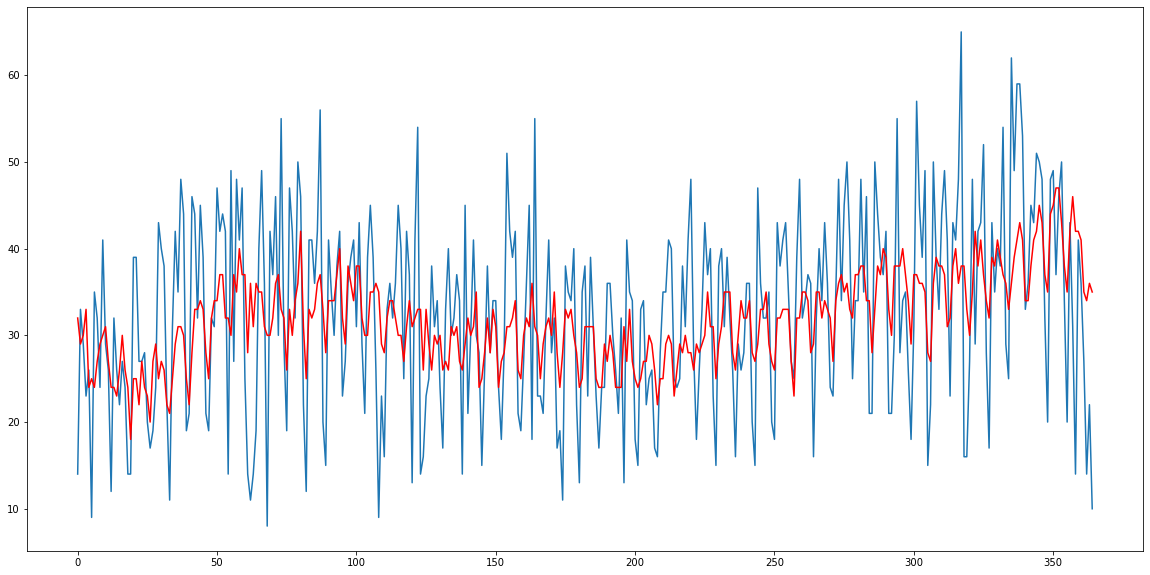

In [409]:
# error
rmse = sqrt(mean_squared_error(df4.Total_Accidents.values, df4.Predictions.values))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(df4.Total_Accidents.values)
pyplot.plot(df4.Predictions.values, color='red')
pyplot.show()

In [406]:
df4

madrugada_norte  madrugada_sul  madrugada_noroeste  \
Date                                                             
2019-01-01                0              3                   0   
2019-01-02                0              1                   0   
2019-01-03                0              0                   0   
2019-01-04                1              0                   0   
2019-01-05                0              2                   0   
...                     ...            ...                 ...   
2019-12-27                0              0                   0   
2019-12-28                1              2                   0   
2019-12-29                0              0                   0   
2019-12-30                0              1                   0   
2019-12-31                1              1                   0   

            madrugada_oeste  madrugada_centro  madrugada_sudoeste  manha_sul  \
Date                                                                           
2019-01-01                0                 0                   0          1   
2019-01-02                0                 0                   0          6   
2019-01-03                0                 0                   0          4   
2019-01-04                1                 0                   1          0   
2019-01-05                0                 0                   0          4   
...                     ...               ...                 ...        ...   
2019-12-27                0                 0                   0          4   
2019-12-28                0                 2                   2          7   
2019-12-29                0                 0                   0          0   
2019-12-30                0                 0                   0          3   
2019-12-31                0                 0                   1          1   

            manha_noroeste  manha_oeste  manha_centro  ...  tarde_sudoeste  \
Date                                                   ...                   
2019-01-01               1            0             0  ...               1   
2019-01-02               3            1             3  ...               3   
2019-01-03               7            0             3  ...               0   
2019-01-04               1            0             0  ...               2   
2019-01-05               1            2             3  ...               1   
...                    ...          ...           ...  ...             ...   
2019-12-27               1            2             2  ...               4   
2019-12-28               3            2             1  ...               0   
2019-12-29               2            0             1  ...               0   
2019-12-30               0            0             3  ...               0   
2019-12-31               0            1             0  ...               2   

            tarde_norte  noite_sul  noite_noroeste  noite_oeste  noite_centro  \
Date                                                                            
2019-01-01            1          1               1            1             0   
2019-01-02            2          1               2            0             0   
2019-01-03            0          1               0            1             0   
2019-01-04            0          2               1            2             2   
2019-01-05            0          0               2            0             0   
...                 ...        ...             ...          ...           ...   
2019-12-27            1          2               1            2             0   
2019-12-28            0          4               0            0             0   
2019-12-29            1          1               1            2             0   
2019-12-30            0          2               1            0             1   
2019-12-31            0          0               0            0             0   

            noite_sudoeste  noite_norte  To

C:\Users\joaog\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


predicted=1.000000, expected=1.000000
predicted=1.000000, expected=3.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.

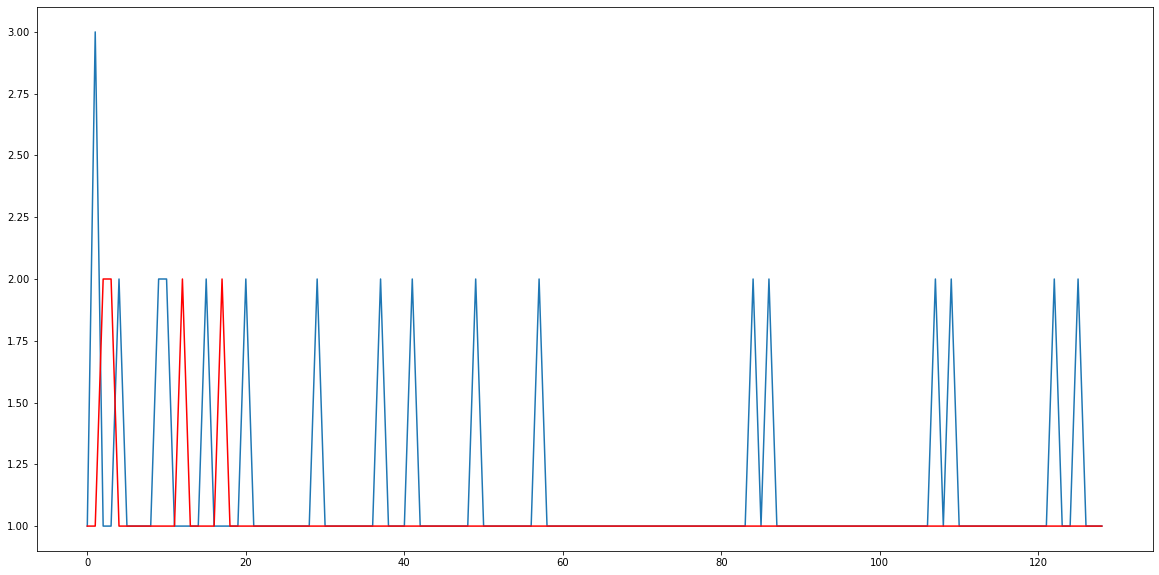

In [393]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = madrugada_norte
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = int(round(yhat + pred_error))
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()


## APENAS HORAS

In [413]:
manha = getOccurrencesPerDay(all_df[all_df.turno == 'manha'])
manha.sort_index(inplace=True)
manha.reset_index(inplace=True)
manha.columns=  ['Date', 'Total_Accident']
manha = manha.set_index('Date')

tarde = getOccurrencesPerDay(all_df[all_df.turno == 'tarde'])
tarde.sort_index(inplace=True)
tarde.reset_index(inplace=True)
tarde.columns=  ['Date', 'Total_Accident']
tarde = tarde.set_index('Date')

noite = getOccurrencesPerDay(all_df[all_df.turno == 'noite'])
noite.sort_index(inplace=True)
noite.reset_index(inplace=True)
noite.columns=  ['Date', 'Total_Accident']
noite = noite.set_index('Date')

madrugada = getOccurrencesPerDay(all_df[all_df.turno == 'madrugada'])
madrugada.sort_index(inplace=True)
madrugada.reset_index(inplace=True)
madrugada.columns=  ['Date', 'Total_Accident']
madrugada = madrugada.set_index('Date')

def fillWithZero(df, date):
    if date in df.index:
        return df[df.index == date].Total_Accident.iloc[0]
    return 0

df_turnos = df
df_turnos['madrugada'] = df2.Date.apply(lambda d: fillWithZero(madrugada, d))
df_turnos['manha'] = df2.Date.apply(lambda d: fillWithZero(manha, d))
df_turnos['tarde'] = df2.Date.apply(lambda d: fillWithZero(tarde, d))
df_turnos['noite'] = df2.Date.apply(lambda d: fillWithZero(noite, d))

df_turnos

Date  Total_Accident  madrugada  manha  tarde  noite
0    2015-06-01              39          0     14     16      9
1    2015-06-02              49          1     15     19     14
2    2015-06-03              46          2     20     16      7
3    2015-06-04              28          3      8      7     10
4    2015-06-05              40          3      8     17     12
...         ...             ...        ...    ...    ...    ...
1670 2019-12-27              37          0     11     17      8
1671 2019-12-28              27          7     13      3      4
1672 2019-12-29              15          0      5      5      4
1673 2019-12-30              23          1     10      5      6
1674 2019-12-31              10          3      2      5      0

[1675 rows x 6 columns]

In [414]:
df_turnos = df_turnos.set_index('Date')
df_turnos.drop('Total_Accident', axis=1,inplace=True)
df_turnos['Total_Accident'] = df_turnos.sum(axis=1)
df_turnos['Predictions'] = 0
df_turnos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1675 entries, 2015-06-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   madrugada       1675 non-null   int64
 1   manha           1675 non-null   int64
 2   tarde           1675 non-null   int64
 3   noite           1675 non-null   int64
 4   Total_Accident  1675 non-null   int64
 5   Predictions     1675 non-null   int64
dtypes: int64(6)
memory usage: 91.6 KB


In [415]:
df4 = df_turnos[df_turnos.index >= '2019']
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   madrugada       365 non-null    int64
 1   manha           365 non-null    int64
 2   tarde           365 non-null    int64
 3   noite           365 non-null    int64
 4   Total_Accident  365 non-null    int64
 5   Predictions     365 non-null    int64
dtypes: int64(6)
memory usage: 20.0 KB


In [416]:
columns_list = ['madrugada', 'manha', 'tarde', 'noite']
df4['Predictions'] = 0
for column in columns_list:
    series = df_turnos[column]
    # create lagged dataset
    values = DataFrame(series.values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t', 't+1']
    # split into train and test sets
    X = dataframe.values
    train_size = 1310
    train, test = X[1:train_size], X[train_size:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]
    # persistence model on training set
    train_pred = [x for x in train_X]
    # calculate residuals
    train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
    # model the training set residuals
    model = AR(train_resid)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
    # walk forward over time steps in test
    history = train_resid[len(train_resid)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = []
    for t in range(len(test_y)):
        # persistence
        yhat = test_X[t]
        error = test_y[t] - yhat
        # predict error
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        pred_error = coef[0]
        for d in range(window):
            pred_error += coef[d+1] * lag[window-d-1]
        # correct the prediction
        yhat = int(round(yhat + pred_error))
        predictions.append(yhat)
        history.append(error)
    df4['Predictions'] += predictions

<ipython-input-416-a07344e35fbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Predictions'] = 0
C:\Users\joaog\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates pa

Test RMSE: 9.004


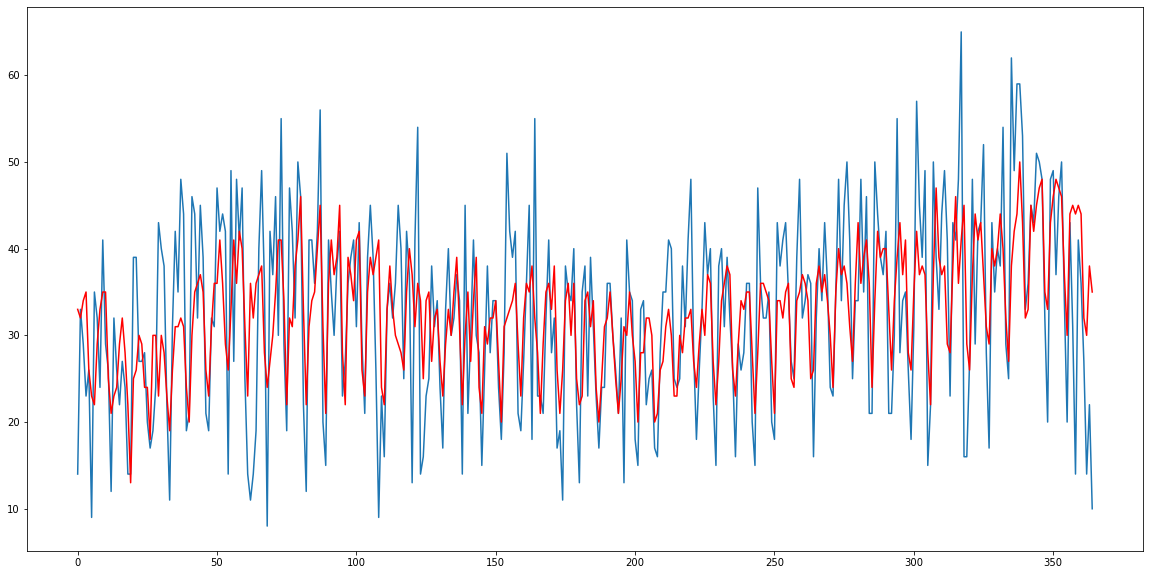

In [419]:
# error
rmse = sqrt(mean_squared_error(df4.Total_Accident.values, df4.Predictions.values))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(df4.Total_Accident.values)
pyplot.plot(df4.Predictions.values, color='red')
pyplot.show()

In [420]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
regression_results(df4.Total_Accident.values, df4.Predictions.values)

explained_variance:  0.3632
mean_squared_log_error:  0.0948
r2:  0.3632
MAE:  6.9589
MSE:  81.063
RMSE:  9.0035
